In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 15)

In [3]:
path_data = r'C:\Users\Scurtu Mihai\Desktop\date.pkl'

In [4]:
data = pd.read_pickle(path_data)

In [5]:
data.head()

,titlu,pret,oras,grad_finisare,descriere,tip_oferta,persoana,etaj,vechime_imobil,numar_bai,...,suprafata,cartier,link,modificari_interioare,balcoane_inchise,aer_conditionat,loc_in_pod,loc_in_pivnita,uscator,pret/suprafata
0,Apartament 4 camere de vanzare in Buna Ziua,87000,"Cluj-Napoca, Cluj, Buna-Ziua",Semifinisat,"Oportunitate de investitie! Va oferim spre vanzare apartament pe 2 nivele, cu scara interioara, in cartierul Buna Ziua, zona Nicolae Tonitza, aproape de magazine si mijloace de transport in comun. Apartamentul este situat la etajul 3 intr-un imobil dispus P+3E+pod. Avand o suprafata utila de 94 m pe 1 nivel si 84 mp pe nivelul 2 - pod, dispune de 4 camere semidecomandate, o bucatarie, 2 bai, 2 logii, la nivelul 1 si un open space la nivelul 2 in pod. Apartamentul se preda la stadiul de semifinisat, glet pentru pereti, sapa autonivelanta pentru pardoseala, CT si calorifere, geamuri termoizolante din PVC, usa metalica la intrare, toate instalatiile trase pe pozitie. Pentru detalii ne puteti contacta telefonic sau la sediul agentiei.",Vand,Agentie Imobiliara,Etajul 3,bloc nou,2,...,94,Buna-Ziua,http://www.piata-az.ro/anunturi/oras-cluj-napoca/7377245,NaN,NaN,NaN,NaN,NaN,NaN,925
1,Apartament o camera de vanzare in Zorilor,41000,"Cluj-Napoca, Cluj, Zorilor",Semifinisat,"Oportunitate de investitie! Va oferim spre vanzare apartament la etaj intermediar, in cartierul Zorilor, zona Zorilor, aproape de mijloace de transport, zona linistita ferita de zgomotul orasului. Apartamentul este situat la etajul 3 intr-un imobil dispus pe 5 nivele. Avand o suprafata utila de 31 mp dispune de o camera semidecomandata, o bucatarie, o baie, un balcon. Finisajele de tip semifinisat sunt evidentiate astfel: pereti cu glet, geamuri termoizolante tripan din PVC, usa de la intrare metalica, instalatiile la pozitie. Sistemul de incalzire in apartament este cu centrala termica. Termen estimat de finalizare al imobilului, 31.01.2018. Optional se poate achizitiona parcare exterioara la un pret de 3000 euro, sau parcare subterana la un pret de 6000 euro. Pentru detalii ne puteti contacta telefonic sau la sediul agentiei.",Vand,Agentie Imobiliara,Etajul 3,bloc nou,1,...,31,Zorilor,http://www.piata-az.ro/anunturi/oras-cluj-napoca/7397801,NaN,NaN,NaN,NaN,NaN,NaN,1322
2,Apartament 2 camere de vanzare in Zorilor,82000,"Cluj-Napoca, Cluj, Zorilor",NaN,"Oportunitate de investitie! Apartament cu finisaje de calitate superioara si dotari cu aparatura de calitate deosebita. Va oferim spre vanzare apartament in cartierul Zorilor, zona Calea Turzii, aproape de statie mijloace de transport, zona linistita ferita de zgomotul orasului. Apartamentul este situat la parter intr-un imobil dispus pe 7 nivele. Avand o suprafata utila de 57 mp dispune de 2 camere semidecomandate, o bucatarie, o baie, un balcon si 2 locuri de parcare. Finisajele de tip modern sunt evidentiate astfel: pardoseala cu parchet laminat, gresie, pereti cu lavabil, bucatarie si baie cu faianta si gresie moderna. Sistemul de incalzire in apartament este cu centrala termica. Apartamentul se vinde complet mobilat si utilat cu frigider, cuptor electric, plita electrica, masina de spalat vase , masina de spalat haine, sistem audio in camera, baie si bucatarie, 2 LCD-uri, aer conditionat, sistem de alarma conectat la firma de paza. Imobilul dipune de iesire exterioara din balcon spre un spatiu amenajat de 300 m, o gradina amenajata in spatele blocului, imprejmuita, dar fara acte de proprietate. Pentru detalii ne puteti contacata telefonic sau la sediul agentiei.",Vand,Agentie Imobiliara,Parter,bloc nou,1,...,57,Zorilor,http://www.piata-az.ro/anunturi/oras-cluj-napoca/7356879,NaN,NaN,NaN,NaN,NaN,NaN,1438
3,Apartament 3 camere de vanzare in Marasti,86500,"Cluj-Napoca, Cluj, Marasti",Semifinisat,"Oportunitate! Va oferim spre vanzare ultimul apartament in bloc nou finalizat la etaj intermediar la 300 m de Kaufland Marasti.\rSuprafata utila este de 67 mp si este compartimentat astfel: 2 dormitoare, living

In [6]:
def valori_unice(col):
    for x in col:
        print('{0} \n\n'.format(x) , data[x].value_counts())
        print('\n')

In [7]:
def valori_nule(col):
    for x in col:
        print('{0}'.format(x) , data[x].isnull().sum())

In [8]:
def tipuri_date():
    data_types = data.columns.to_series().groupby(data.dtypes).groups
    return data_types

In [9]:
coloane = data.columns.tolist()

In [10]:
coloane

['titlu',
 'pret',
 'oras',
 'grad_finisare',
 'descriere',
 'tip_oferta',
 'persoana',
 'etaj',
 'vechime_imobil',
 'numar_bai',
 'numar_balcoane',
 'geamuri_termopan',
 'centrala_termica',
 'compatimentare',
 'parchet',
 'confort',
 'gresie',
 'faianta',
 'zugravit_lavabil',
 'loc_parcare',
 'agentie',
 'numar_camere',
 'strada',
 'suprafata',
 'cartier',
 'link',
 'modificari_interioare',
 'balcoane_inchise',
 'aer_conditionat',
 'loc_in_pod',
 'loc_in_pivnita',
 'uscator',
 'pret/suprafata']

In [11]:
coloane_one_hot = ['grad_finisare',  'etaj', 'vechime_imobil', 'numar_bai', 'numar_balcoane', 'geamuri_termopan', 'centrala_termica', 'compatimentare', 'parchet', 'confort', 'gresie', 'faianta', 'zugravit_lavabil', 'loc_parcare', 'numar_camere',  'cartier','modificari_interioare', 'balcoane_inchise', 'aer_conditionat', 'loc_in_pod', 'loc_in_pivnita', 'uscator']

In [12]:
_ = valori_unice(coloane_one_hot)
_

grad_finisare 

 Finisat modern       1165
Semifinisat          983 
Finisat clasic       779 
Ultrafinisat         376 
Nefinisat            224 
Renovat              63  
Necesita renovare    37  
Name: grad_finisare, dtype: int64


etaj 

 Etajul 1            1172
Parter              1126
Etajul 2            941 
Etajul 3            800 
Etajul 4            718 
Etaj intermediar    384 
Etajul 5            220 
Ultimul etaj        186 
Etajul 7            174 
Etajul 8            136 
Etajul 6            123 
Etajul 10           99  
Etajul 9            96  
Demisol             70  
Mansarda            70  
Name: etaj, dtype: int64


vechime_imobil 

 mai vechi de 2000    3154
bloc nou             2415
In constructie       201 
Name: vechime_imobil, dtype: int64


numar_bai 

 1      3997
2      1899
3      38  
1.0    6   
4      2   
Name: numar_bai, dtype: int64


numar_balcoane 

 1                   2925
2                   1069
Fara balcon         203 
3                   131 

In [13]:
_ = valori_nule(coloane_one_hot)
_

grad_finisare 3986
etaj 1298
vechime_imobil 1843
numar_bai 1671
numar_balcoane 3152
geamuri_termopan 2747
centrala_termica 1841
compatimentare 1216
parchet 2651
confort 1848
gresie 4193
faianta 2610
zugravit_lavabil 3059
loc_parcare 5271
numar_camere 0
cartier 0
modificari_interioare 7263
balcoane_inchise 6768
aer_conditionat 7298
loc_in_pod 6913
loc_in_pivnita 6619
uscator 6957


In [14]:
var_tinta = data.pret

In [15]:
var_intrare = data[coloane_one_hot]

In [16]:
var_intrare = pd.get_dummies(var_intrare, columns=coloane_one_hot)

In [17]:
var_intrare.columns.tolist()

['grad_finisare_Finisat clasic',
 'grad_finisare_Finisat modern',
 'grad_finisare_Necesita renovare',
 'grad_finisare_Nefinisat',
 'grad_finisare_Renovat',
 'grad_finisare_Semifinisat',
 'grad_finisare_Ultrafinisat',
 'etaj_Demisol',
 'etaj_Etaj intermediar',
 'etaj_Etajul 1',
 'etaj_Etajul 10',
 'etaj_Etajul 2',
 'etaj_Etajul 3',
 'etaj_Etajul 4',
 'etaj_Etajul 5',
 'etaj_Etajul 6',
 'etaj_Etajul 7',
 'etaj_Etajul 8',
 'etaj_Etajul 9',
 'etaj_Mansarda',
 'etaj_Parter',
 'etaj_Ultimul etaj',
 'vechime_imobil_In constructie',
 'vechime_imobil_bloc nou',
 'vechime_imobil_mai vechi de 2000',
 'numar_bai_1.0',
 'numar_bai_1',
 'numar_bai_2',
 'numar_bai_3',
 'numar_bai_4',
 'numar_balcoane_1.0',
 'numar_balcoane_1',
 'numar_balcoane_2',
 'numar_balcoane_3',
 'numar_balcoane_Balcoane inchise',
 'numar_balcoane_Balcon inchis',
 'numar_balcoane_Fara balcon',
 'numar_balcoane_Terasa',
 'geamuri_termopan_Da',
 'centrala_termica_Da',
 'compatimentare_Circular',
 'compatimentare_Decomandat',
 'co

In [18]:
var_intrare = pd.concat([var_intrare, data.suprafata], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import median_absolute_error
from sklearn import metrics

F:\Anaconda323\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Pentru prima incercare vom aplica algoritmii pe tot setul de date.

In [20]:
adancime_arbore = [15, 25, 30, 35, 40, 45, 50, 55]

In [21]:
frunze = [5, 10, 15, 20, 25, 30]

In [22]:

for i in adancime_arbore:
    for x in frunze:
        arbore = DecisionTreeRegressor(min_samples_leaf=x, max_depth=i)

        #arbore.fit(train_x, train_y)

        scor = cross_val_score(arbore, var_intrare, var_tinta, cv=5, scoring="r2")
        print(scor.mean(),'cu adancimea arborelui {0}'.format(i), 'si cu numarul minim de exemple pe frunze {0}'.format(x))

        #scor2 = cross_val_score(arbore, var_intrare, var_tinta, cv=5, scoring="neg_mean_absolute_error")
        #scor2 = -scor2
        #print(scor2.mean(),'cu adancimea arborelui {0}'.format(i), 'si cu numarul minim de exemple pe frunze {0}'.format(x))

0.702075803486 cu adancimea arborelui 15 si cu numarul minim de exemple pe frunze 5
0.714008259333 cu adancimea arborelui 15 si cu numarul minim de exemple pe frunze 10
0.703342868724 cu adancimea arborelui 15 si cu numarul minim de exemple pe frunze 15
0.705781018377 cu adancimea arborelui 15 si cu numarul minim de exemple pe frunze 20
0.703577455052 cu adancimea arborelui 15 si cu numarul minim de exemple pe frunze 25
0.703068208883 cu adancimea arborelui 15 si cu numarul minim de exemple pe frunze 30
0.695897709606 cu adancimea arborelui 25 si cu numarul minim de exemple pe frunze 5
0.713253158641 cu adancimea arborelui 25 si cu numarul minim de exemple pe frunze 10
0.703029626779 cu adancimea arborelui 25 si cu numarul minim de exemple pe frunze 15
0.705498845011 cu adancimea arborelui 25 si cu numarul minim de exemple pe frunze 20
0.703374634323 cu adancimea arborelui 25 si cu numarul minim de exemple pe frunze 25
0.702965590466 cu adancimea arborelui 25 si cu numarul minim de exe

In [23]:
for i in adancime_arbore:
    arboreAda = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i), n_estimators=100, random_state=1)
    arboreAda.fit(var_intrare, var_tinta)


    #predictieAda = arboreAda.predict(val_X)

    scor = cross_val_score(arboreAda, var_intrare, var_tinta, cv=5, scoring="r2")
    print(scor.mean() ,'cu adancimea arborelui {0}'.format(i))

    scor = cross_val_score(arboreAda, var_intrare, var_tinta, cv=5, scoring="neg_mean_absolute_error")
    print(-scor.mean() , 'cu adancimea arborelui {0}'.format(i))

0.776697962772 cu adancimea arborelui 15
10714.815637 cu adancimea arborelui 15
0.780876356676 cu adancimea arborelui 25
10257.3795156 cu adancimea arborelui 25
0.781037485892 cu adancimea arborelui 30
10234.5585956 cu adancimea arborelui 30
0.782361174434 cu adancimea arborelui 35
10239.0497051 cu adancimea arborelui 35
0.780336647054 cu adancimea arborelui 40
10278.3444569 cu adancimea arborelui 40
0.77716819408 cu adancimea arborelui 45
10311.0031209 cu adancimea arborelui 45
0.777652325784 cu adancimea arborelui 50
10302.2340094 cu adancimea arborelui 50
0.777652325784 cu adancimea arborelui 55
10302.2340094 cu adancimea arborelui 55


In [24]:
from sklearn.neural_network import MLPRegressor

In [25]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(var_intrare)

scaler_intrare = scaler.transform(var_intrare)


In [26]:
for i in [50, 100, 150, 200, 250, 300, 350, 400]:
    NN = MLPRegressor(solver='lbfgs', activation='logistic', alpha=0.01, hidden_layer_sizes=(i), random_state=1)

    #NN.fit(scaler_intrare, var_tinta)

    scor = cross_val_score(NN, scaler_intrare, var_tinta, cv=5, scoring="r2")
    print(scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

    #scor = cross_val_score(NN, scaler_intrare, var_tinta, cv=5, scoring="neg_mean_absolute_error")
    #print(-scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

0.659370818679 cu 1 hidden layer si unitati 50
0.696952249145 cu 1 hidden layer si unitati 100
0.710859711625 cu 1 hidden layer si unitati 150
0.730516659442 cu 1 hidden layer si unitati 200
0.737074933723 cu 1 hidden layer si unitati 250
0.743101096587 cu 1 hidden layer si unitati 300
0.736405639276 cu 1 hidden layer si unitati 350
0.740166997145 cu 1 hidden layer si unitati 400


In [27]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=1e3)
scor = cross_val_score(svr_lin, scaler_intrare, var_tinta, cv=5, scoring="r2")
print(scor.mean())

#scor = cross_val_score(svr_lin, scaler_intrare, var_tinta, cv=5, scoring="neg_mean_absolute_error")
#print(-scor.mean())

0.735293474187


In [28]:
mask_c1 = data['numar_camere'] == 1
data_c1 = data[mask_c1]
mask_c1.sum()

1222

In [29]:
mask_c2 = data['numar_camere'] == 2
data_c2 = data[mask_c2]
mask_c2.sum()

3130

In [30]:
mask_c3 = data['numar_camere'] == 3
data_c3 = data[mask_c3]
mask_c3.sum()

2498

In [31]:
mask_c4 = data['numar_camere'] == 4
data_c4 = data[mask_c4]
mask_c4.sum()

704

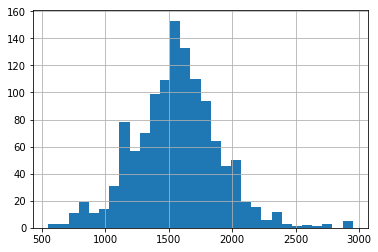

In [32]:
data_c1['pret/suprafata'].hist(bins=30)
plt.show()


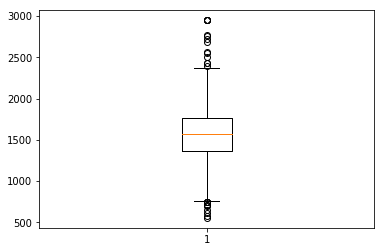

In [33]:
plt.boxplot(data_c1['pret/suprafata'])
plt.show()

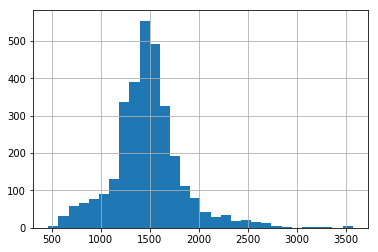

In [34]:
data_c2['pret/suprafata'].hist(bins=30)
plt.show()

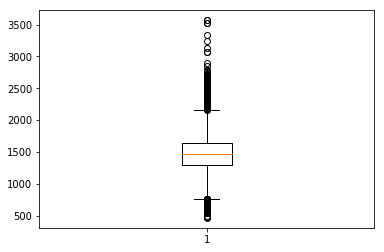

In [35]:
plt.boxplot(data_c2['pret/suprafata'].values)
plt.show()

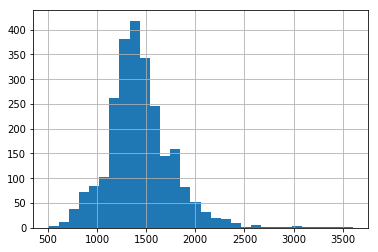

In [36]:
data_c3['pret/suprafata'].hist(bins=30)
plt.show()


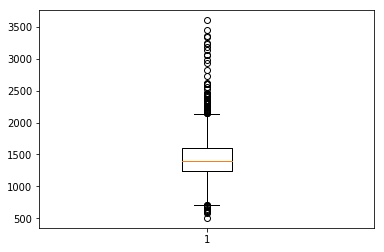

In [37]:
plt.boxplot(data_c3['pret/suprafata'].values)
plt.show()

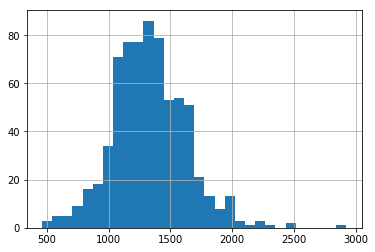

In [38]:
data_c4['pret/suprafata'].hist(bins=30)
plt.show()


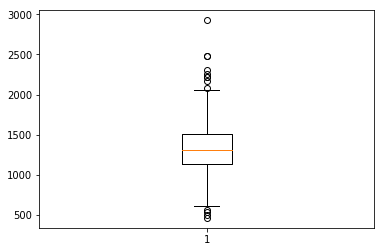

In [39]:
plt.boxplot(data_c4['pret/suprafata'].values)
plt.show()

In [40]:
data['numar_camere'].value_counts()

2    3130
3    2498
1    1222
4    704 
5    50  
6    8   
7    1   
Name: numar_camere, dtype: int64

In [41]:
data2 = data[data['pret/suprafata'] < 2500]

In [42]:
data2 = data2[data2['pret/suprafata'] > 600]

In [43]:
data_c1 = data_c1[data_c1['pret/suprafata'] < 2500]
data_c1 = data_c1[data_c1['pret/suprafata'] > 750]

In [44]:
data_c2 = data_c2[data_c2['pret/suprafata'] < 2300]
data_c2 = data_c2[data_c2['pret/suprafata'] > 750]

In [45]:
data_c3 = data_c3[data_c3['pret/suprafata'] < 2200]
data_c3 = data_c3[data_c3['pret/suprafata'] > 700]

In [46]:
data_c4 = data_c4[data_c4['pret/suprafata'] < 2000]
data_c4 = data_c4[data_c4['pret/suprafata'] > 700]

In [47]:
datac= data_c1.append(data_c2, ignore_index=True)

In [48]:
datac= datac.append(data_c3, ignore_index=True)

In [49]:
datac= datac.append(data_c4, ignore_index=True)

In [50]:
len(datac)

7254

In [51]:
datac.columns.tolist()

['titlu',
 'pret',
 'oras',
 'grad_finisare',
 'descriere',
 'tip_oferta',
 'persoana',
 'etaj',
 'vechime_imobil',
 'numar_bai',
 'numar_balcoane',
 'geamuri_termopan',
 'centrala_termica',
 'compatimentare',
 'parchet',
 'confort',
 'gresie',
 'faianta',
 'zugravit_lavabil',
 'loc_parcare',
 'agentie',
 'numar_camere',
 'strada',
 'suprafata',
 'cartier',
 'link',
 'modificari_interioare',
 'balcoane_inchise',
 'aer_conditionat',
 'loc_in_pod',
 'loc_in_pivnita',
 'uscator',
 'pret/suprafata']

In [52]:
var_tinta2 = datac.pret

In [53]:
var_intrare2 = datac[coloane_one_hot]

In [54]:
var_intrare2 = pd.get_dummies(var_intrare2, columns=coloane_one_hot)

In [55]:
var_intrare2 = pd.concat([var_intrare2, datac.suprafata], axis=1)

In [56]:
for i in adancime_arbore:
    arboreAda2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i), n_estimators=100, random_state=1)
    


    scor = cross_val_score(arboreAda2, var_intrare2, var_tinta2, cv=5, scoring="r2")
    print(scor.mean(),'cu adancimea arborelui {0}'.format(i))

    #scor = cross_val_score(arboreAda2, var_intrare2, var_tinta2, cv=5, scoring="neg_mean_absolute_error")
    #print(scor.mean())

0.634920090914 cu adancimea arborelui 15
0.641632282142 cu adancimea arborelui 25
0.634959090387 cu adancimea arborelui 30
0.628800588372 cu adancimea arborelui 35
0.631817088635 cu adancimea arborelui 40
0.629197209042 cu adancimea arborelui 45
0.629197209042 cu adancimea arborelui 50
0.629197209042 cu adancimea arborelui 55


In [57]:
scaler2 = StandardScaler()


scaler2.fit(var_intrare2)

scaler_intrare2 = scaler2.transform(var_intrare2)

In [58]:
for i in [50, 100, 150, 200, 250, 300, 350, 400]:
    NN = MLPRegressor(solver='lbfgs', activation='logistic', alpha=0.01, hidden_layer_sizes=(i), random_state=1)

    scor = cross_val_score(NN, scaler_intrare2, var_tinta2, cv=5, scoring="r2")
    print(scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))
    

    #scor = cross_val_score(NN, scaler_intrare, var_tinta, cv=5, scoring="neg_mean_absolute_error")
    #print(-scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

-0.820618603291 cu 1 hidden layer si unitati 50
-0.453061246497 cu 1 hidden layer si unitati 100
-0.706376895625 cu 1 hidden layer si unitati 150
-0.145081080603 cu 1 hidden layer si unitati 200
-0.658215789917 cu 1 hidden layer si unitati 250
-0.516730101375 cu 1 hidden layer si unitati 300
-0.735054108069 cu 1 hidden layer si unitati 350
-0.960220877649 cu 1 hidden layer si unitati 400


In [59]:
datac['numar_camere'].value_counts()

2    2951
3    2430
1    1198
4    675 
Name: numar_camere, dtype: int64

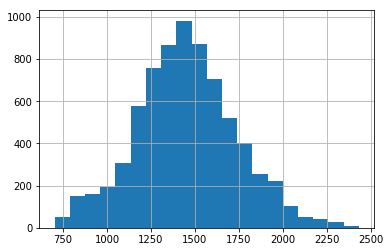

In [60]:
datac['pret/suprafata'].hist(bins=20)
plt.show()

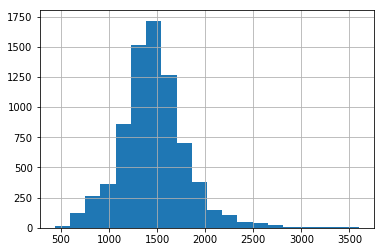

In [61]:
data['pret/suprafata'].hist(bins=20)
plt.show()

In [62]:
_ = tipuri_date()

In [63]:
_

{dtype('int64'): Index(['pret', 'numar_camere', 'suprafata', 'pret/suprafata'], dtype='object'),
 dtype('O'): Index(['titlu', 'oras', 'grad_finisare', 'descriere', 'tip_oferta', 'persoana',
        'etaj', 'vechime_imobil', 'numar_bai', 'numar_balcoane',
        'geamuri_termopan', 'centrala_termica', 'compatimentare', 'parchet',
        'confort', 'gresie', 'faianta', 'zugravit_lavabil', 'loc_parcare',
        'agentie', 'strada', 'cartier', 'link', 'modificari_interioare',
        'balcoane_inchise', 'aer_conditionat', 'loc_in_pod', 'loc_in_pivnita',
        'uscator'],
       dtype='object')}

In [64]:
data['cartier'].value_counts()

Manastur      1550
Marasti       1389
Gheorgheni    1028
Centru        928 
Zorilor       575 
Grigorescu    433 
Buna-Ziua     331 
             ...  
Apahida       32  
Someseni      24  
Gara          23  
Bulgaria      17  
Faget         2   
Feleacu       1   
Sopor         1   
Name: cartier, Length: 23, dtype: int64

In [65]:
data2 = data.copy()

In [66]:
data2['cartier'].dropna(inplace=True)

In [67]:
data2.head()

,titlu,pret,oras,grad_finisare,descriere,tip_oferta,persoana,etaj,vechime_imobil,numar_bai,...,suprafata,cartier,link,modificari_interioare,balcoane_inchise,aer_conditionat,loc_in_pod,loc_in_pivnita,uscator,pret/suprafata
0,Apartament 4 camere de vanzare in Buna Ziua,87000,"Cluj-Napoca, Cluj, Buna-Ziua",Semifinisat,"Oportunitate de investitie! Va oferim spre vanzare apartament pe 2 nivele, cu scara interioara, in cartierul Buna Ziua, zona Nicolae Tonitza, aproape de magazine si mijloace de transport in comun. Apartamentul este situat la etajul 3 intr-un imobil dispus P+3E+pod. Avand o suprafata utila de 94 m pe 1 nivel si 84 mp pe nivelul 2 - pod, dispune de 4 camere semidecomandate, o bucatarie, 2 bai, 2 logii, la nivelul 1 si un open space la nivelul 2 in pod. Apartamentul se preda la stadiul de semifinisat, glet pentru pereti, sapa autonivelanta pentru pardoseala, CT si calorifere, geamuri termoizolante din PVC, usa metalica la intrare, toate instalatiile trase pe pozitie. Pentru detalii ne puteti contacta telefonic sau la sediul agentiei.",Vand,Agentie Imobiliara,Etajul 3,bloc nou,2,...,94,Buna-Ziua,http://www.piata-az.ro/anunturi/oras-cluj-napoca/7377245,NaN,NaN,NaN,NaN,NaN,NaN,925
1,Apartament o camera de vanzare in Zorilor,41000,"Cluj-Napoca, Cluj, Zorilor",Semifinisat,"Oportunitate de investitie! Va oferim spre vanzare apartament la etaj intermediar, in cartierul Zorilor, zona Zorilor, aproape de mijloace de transport, zona linistita ferita de zgomotul orasului. Apartamentul este situat la etajul 3 intr-un imobil dispus pe 5 nivele. Avand o suprafata utila de 31 mp dispune de o camera semidecomandata, o bucatarie, o baie, un balcon. Finisajele de tip semifinisat sunt evidentiate astfel: pereti cu glet, geamuri termoizolante tripan din PVC, usa de la intrare metalica, instalatiile la pozitie. Sistemul de incalzire in apartament este cu centrala termica. Termen estimat de finalizare al imobilului, 31.01.2018. Optional se poate achizitiona parcare exterioara la un pret de 3000 euro, sau parcare subterana la un pret de 6000 euro. Pentru detalii ne puteti contacta telefonic sau la sediul agentiei.",Vand,Agentie Imobiliara,Etajul 3,bloc nou,1,...,31,Zorilor,http://www.piata-az.ro/anunturi/oras-cluj-napoca/7397801,NaN,NaN,NaN,NaN,NaN,NaN,1322
2,Apartament 2 camere de vanzare in Zorilor,82000,"Cluj-Napoca, Cluj, Zorilor",NaN,"Oportunitate de investitie! Apartament cu finisaje de calitate superioara si dotari cu aparatura de calitate deosebita. Va oferim spre vanzare apartament in cartierul Zorilor, zona Calea Turzii, aproape de statie mijloace de transport, zona linistita ferita de zgomotul orasului. Apartamentul este situat la parter intr-un imobil dispus pe 7 nivele. Avand o suprafata utila de 57 mp dispune de 2 camere semidecomandate, o bucatarie, o baie, un balcon si 2 locuri de parcare. Finisajele de tip modern sunt evidentiate astfel: pardoseala cu parchet laminat, gresie, pereti cu lavabil, bucatarie si baie cu faianta si gresie moderna. Sistemul de incalzire in apartament este cu centrala termica. Apartamentul se vinde complet mobilat si utilat cu frigider, cuptor electric, plita electrica, masina de spalat vase , masina de spalat haine, sistem audio in camera, baie si bucatarie, 2 LCD-uri, aer conditionat, sistem de alarma conectat la firma de paza. Imobilul dipune de iesire exterioara din balcon spre un spatiu amenajat de 300 m, o gradina amenajata in spatele blocului, imprejmuita, dar fara acte de proprietate. Pentru detalii ne puteti contacata telefonic sau la sediul agentiei.",Vand,Agentie Imobiliara,Parter,bloc nou,1,...,57,Zorilor,http://www.piata-az.ro/anunturi/oras-cluj-napoca/7356879,NaN,NaN,NaN,NaN,NaN,NaN,1438
3,Apartament 3 camere de vanzare in Marasti,86500,"Cluj-Napoca, Cluj, Marasti",Semifinisat,"Oportunitate! Va oferim spre vanzare ultimul apartament in bloc nou finalizat la etaj intermediar la 300 m de Kaufland Marasti.\rSuprafata utila este de 67 mp si este compartimentat astfel: 2 dormitoare, living

In [68]:
cartiere_afara = ['Borhanci', 'Faget', 'Feleacu', 'Sopor', 'Someseni', 'Apahida', 'Dambul-Rotund', 'Baciu']

In [69]:
data2['vechime_imobil'].value_counts()

mai vechi de 2000    3154
bloc nou             2415
In constructie       201 
Name: vechime_imobil, dtype: int64

In [70]:
data2 = data2[data2['vechime_imobil'] != 'In constructie']

In [71]:
for i in cartiere_afara:
    data2 = data2[data2['cartier'] != i]

In [72]:
data2['vechime_imobil'].value_counts()

mai vechi de 2000    3113
bloc nou             2181
Name: vechime_imobil, dtype: int64

In [73]:
data2['cartier'].value_counts()

Manastur           1546
Marasti            1340
Gheorgheni         1006
Centru             915 
Zorilor            565 
Grigorescu         425 
Buna-Ziua          315 
Floresti           303 
Europa             216 
Andrei Muresanu    129 
Plopilor           123 
Iris               105 
Gruia              69  
Gara               23  
Bulgaria           17  
Name: cartier, dtype: int64

In [74]:
data2.shape

(7097, 33)

In [75]:
data2 = data2[data2['numar_camere'] <5]

In [76]:
var_tinta3 = data2.pret

In [77]:
var_intrare3 = data2[coloane_one_hot]

In [78]:
var_intrare3 = pd.get_dummies(var_intrare3, columns=coloane_one_hot)

In [79]:
var_intrare3 = pd.concat([var_intrare3, data2.suprafata], axis=1)

In [80]:
for i in adancime_arbore:
    arboreAda3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i), n_estimators=100, random_state=1)
    


    scor = cross_val_score(arboreAda3, var_intrare3, var_tinta3, cv=5, scoring="r2")
    print(scor.mean(),'cu adancimea arborelui {0}'.format(i))

    #scor = cross_val_score(arboreAda3, var_intrare3, var_tinta3, cv=5, scoring="neg_mean_absolute_error")
    #print(-scor.mean(),'cu adancimea arborelui {0}'.format(i))

0.772949395348 cu adancimea arborelui 15
0.773220695243 cu adancimea arborelui 25
0.77627393607 cu adancimea arborelui 30
0.778102435116 cu adancimea arborelui 35
0.775341278906 cu adancimea arborelui 40
0.776361955632 cu adancimea arborelui 45
0.776361955632 cu adancimea arborelui 50
0.776361955632 cu adancimea arborelui 55


In [81]:


scaler3 = StandardScaler()


scaler3.fit(var_intrare3)

scaler_intrare3 = scaler3.transform(var_intrare3)

In [82]:
for i in [50, 100, 150, 200, 250, 300, 350, 400]:
    NN = MLPRegressor(solver='lbfgs', activation='logistic', alpha=0.01, hidden_layer_sizes=(i), random_state=1)


    scor = cross_val_score(NN, scaler_intrare3, var_tinta3, cv=5, scoring="r2")
    print(scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

    #scor = cross_val_score(NN, scaler_intrare3, var_tinta3, cv=5, scoring="neg_mean_absolute_error")
    #print(-scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

0.617062483596 cu 1 hidden layer si unitati 50
0.67957207135 cu 1 hidden layer si unitati 100
0.697100735189 cu 1 hidden layer si unitati 150
0.711392763685 cu 1 hidden layer si unitati 200
0.722134917916 cu 1 hidden layer si unitati 250
0.727787590915 cu 1 hidden layer si unitati 300
0.726397674104 cu 1 hidden layer si unitati 350
0.728362565465 cu 1 hidden layer si unitati 400


In [83]:
len(data)

7613

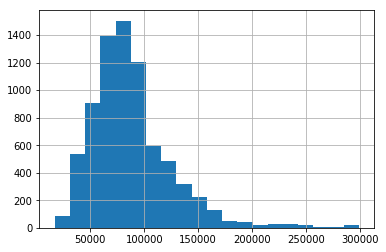

In [84]:
data.pret.hist(bins=20)
plt.show()

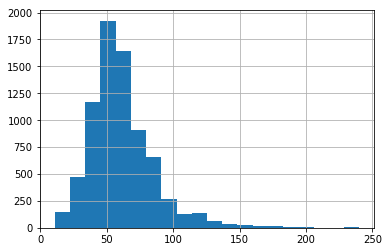

In [85]:
data.suprafata.hist(bins=20)
plt.show()

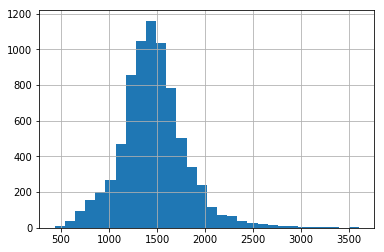

In [86]:
data['pret/suprafata'].hist(bins=30)
plt.show()

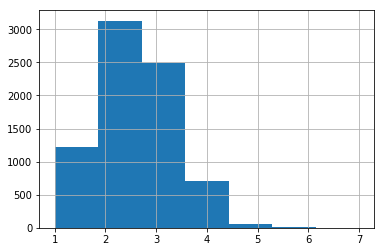

In [87]:
data['numar_camere'].hist(bins=7)
plt.show()

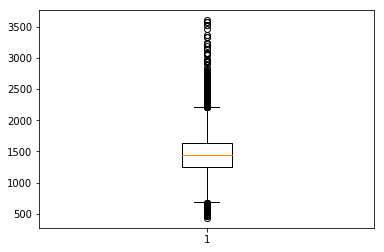

In [88]:
plt.boxplot(data['pret/suprafata'])
plt.show()

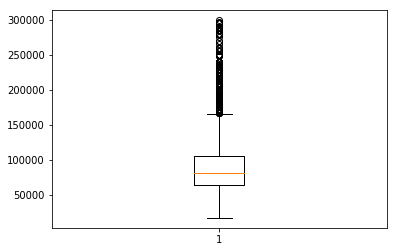

In [89]:
plt.boxplot(data['pret'])
plt.show()

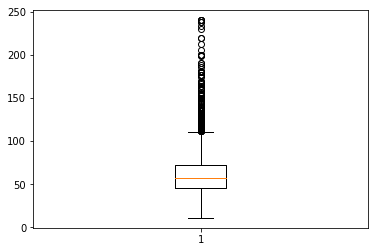

In [90]:
plt.boxplot(data['suprafata'])
plt.show()

In [91]:
lista_cartiere = data.cartier.unique()

In [92]:
lista_cartiere=lista_cartiere.tolist()

In [93]:
lista_col = data.columns.tolist()

In [94]:
lista_col

['titlu',
 'pret',
 'oras',
 'grad_finisare',
 'descriere',
 'tip_oferta',
 'persoana',
 'etaj',
 'vechime_imobil',
 'numar_bai',
 'numar_balcoane',
 'geamuri_termopan',
 'centrala_termica',
 'compatimentare',
 'parchet',
 'confort',
 'gresie',
 'faianta',
 'zugravit_lavabil',
 'loc_parcare',
 'agentie',
 'numar_camere',
 'strada',
 'suprafata',
 'cartier',
 'link',
 'modificari_interioare',
 'balcoane_inchise',
 'aer_conditionat',
 'loc_in_pod',
 'loc_in_pivnita',
 'uscator',
 'pret/suprafata']

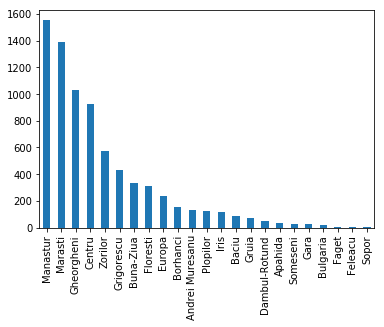

In [95]:
pd.value_counts(data['cartier']).plot.bar()
plt.show()

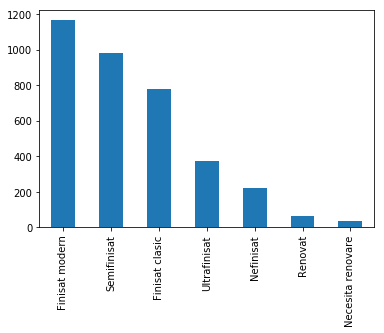

In [96]:
pd.value_counts(data['grad_finisare']).plot.bar()
plt.show()

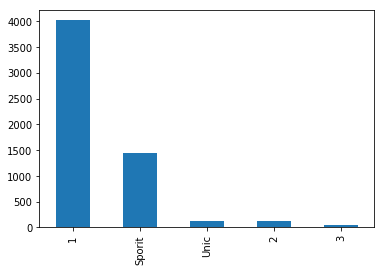

In [97]:
pd.value_counts(data['confort']).plot.bar()
plt.show()

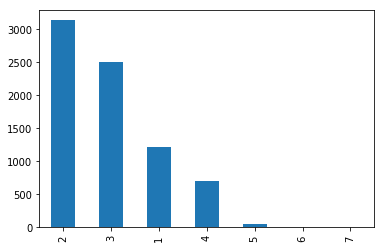

In [98]:
pd.value_counts(data['numar_camere']).plot.bar()
plt.show()

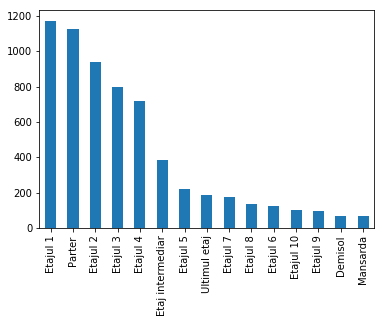

In [99]:
pd.value_counts(data['etaj']).plot.bar()
plt.show()

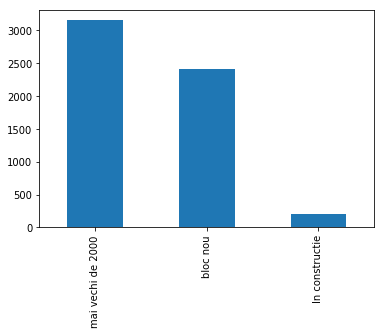

In [100]:
pd.value_counts(data['vechime_imobil']).plot.bar()
plt.show()

In [101]:
camere = data['numar_camere'].unique()
camere = camere.tolist()
camere.sort()
camere

[1, 2, 3, 4, 5, 6, 7]

In [102]:
len(camere)

7

In [103]:
cartiere = data['cartier'].unique()
cartiere = cartiere.tolist()
cartiere

['Buna-Ziua',
 'Zorilor',
 'Marasti',
 'Centru',
 'Borhanci',
 'Andrei Muresanu',
 'Gheorgheni',
 'Manastur',
 'Baciu',
 'Plopilor',
 'Bulgaria',
 'Europa',
 'Grigorescu',
 'Dambul-Rotund',
 'Iris',
 'Floresti',
 'Apahida',
 'Gruia',
 'Faget',
 'Someseni',
 'Gara',
 'Sopor',
 'Feleacu']

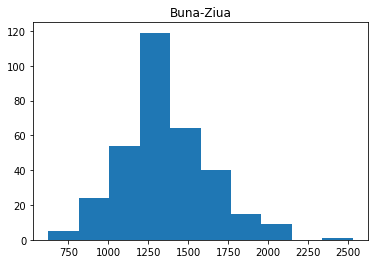

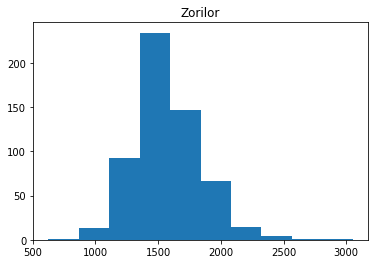

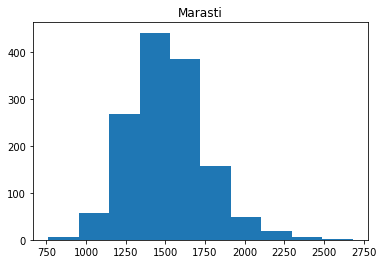

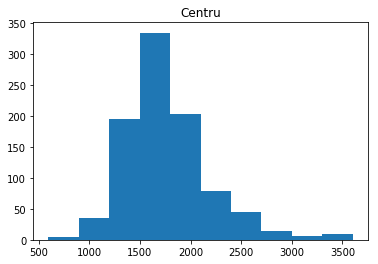

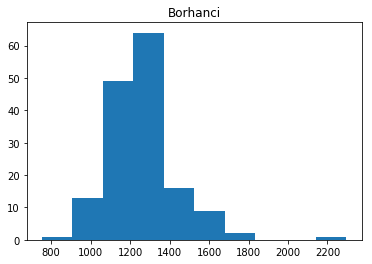

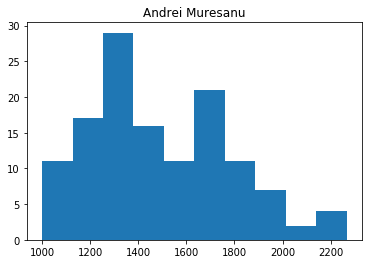

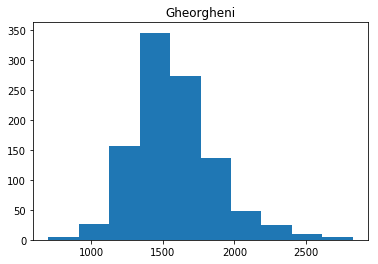

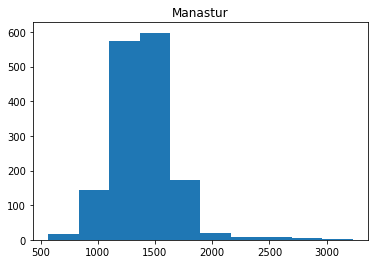

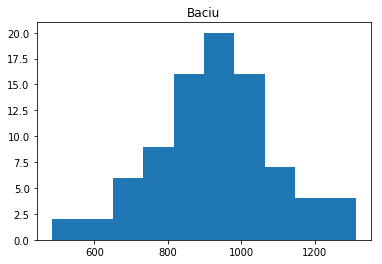

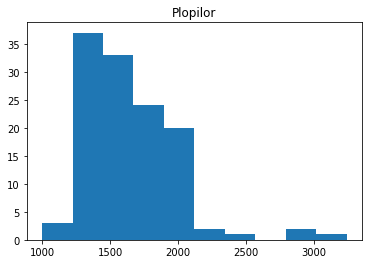

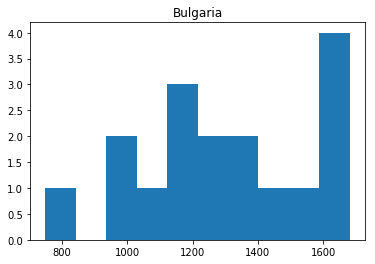

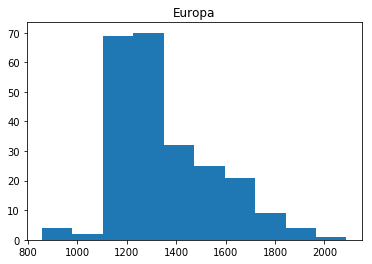

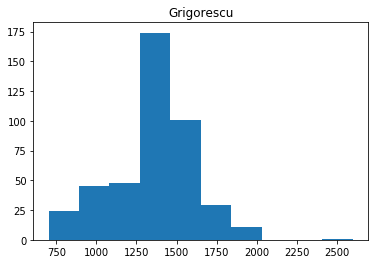

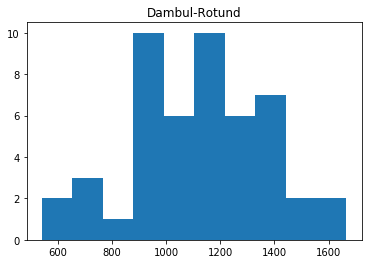

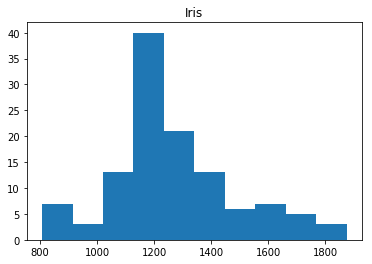

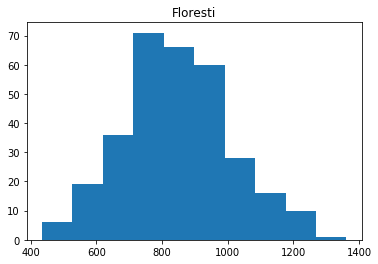

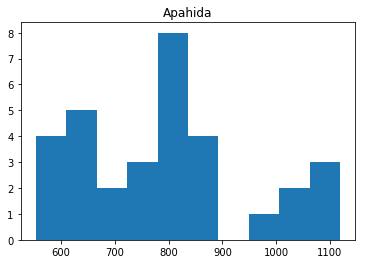

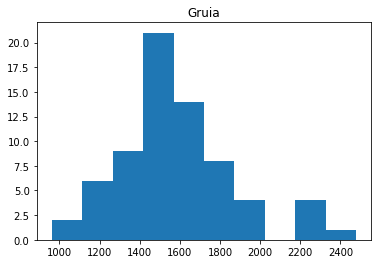

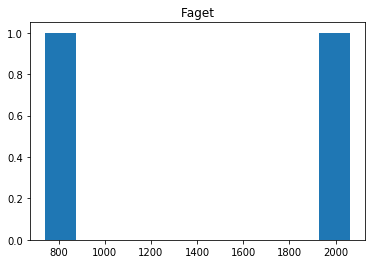

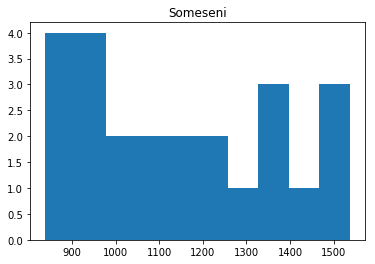

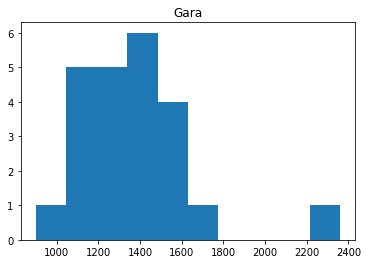

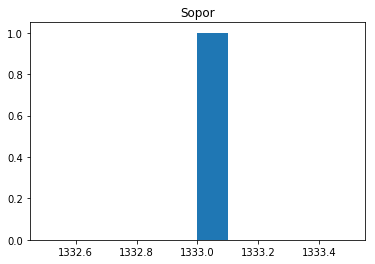

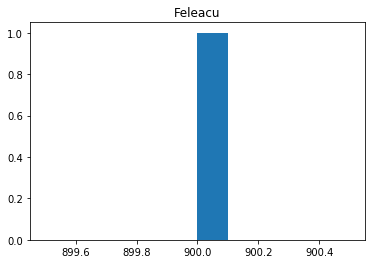

In [104]:
for i in cartiere:
    x = data[data['cartier'] == i]
    plt.hist(x['pret/suprafata'])
    plt.title(i)
    plt.show()    
    #data_c1 = data_c1[data_c1['pret/suprafata'] < 2500]

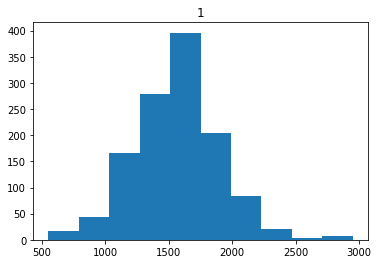

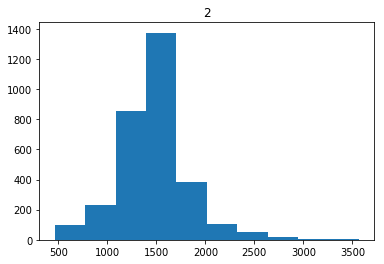

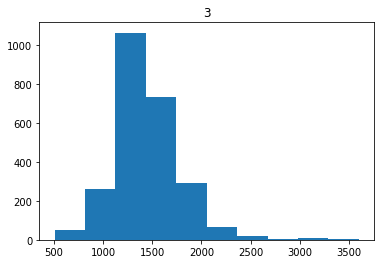

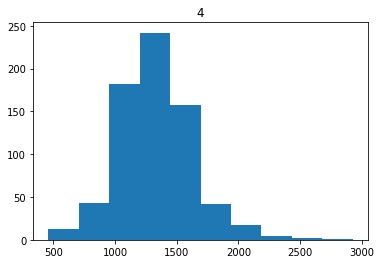

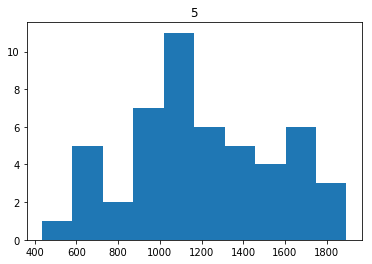

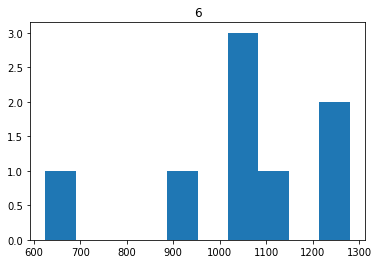

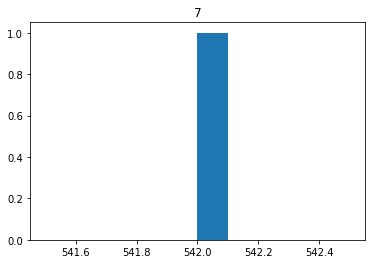

In [105]:
for i in camere:
    x = data[data['numar_camere'] == i]
    plt.hist(x['pret/suprafata'])
    plt.title(i)
    plt.show()

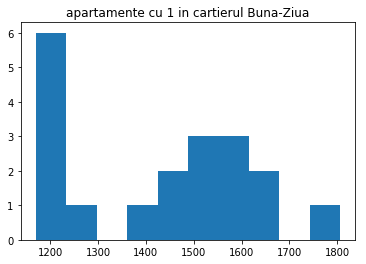

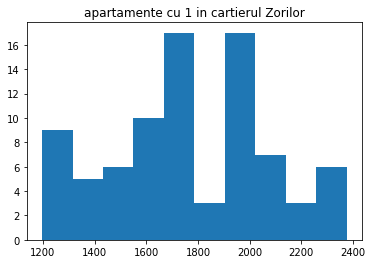

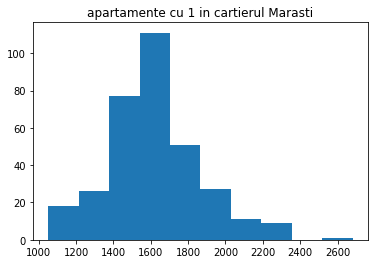

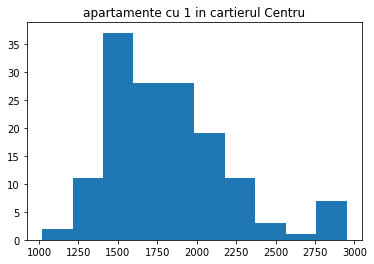

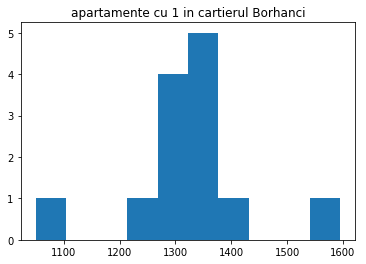

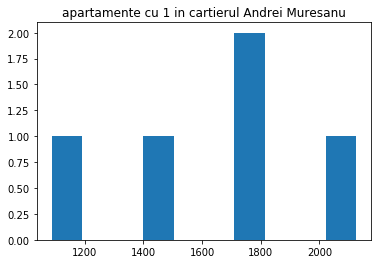

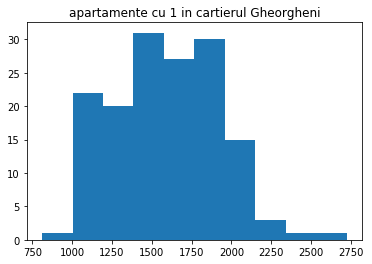

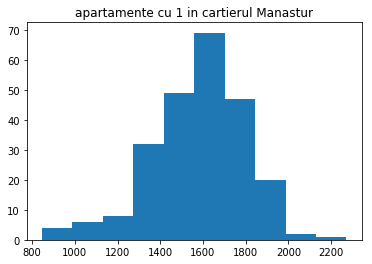

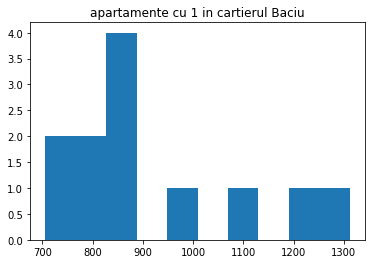

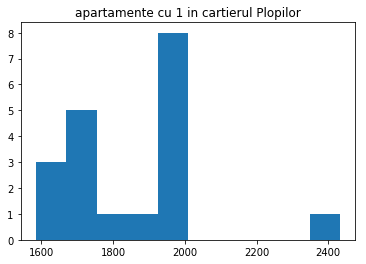

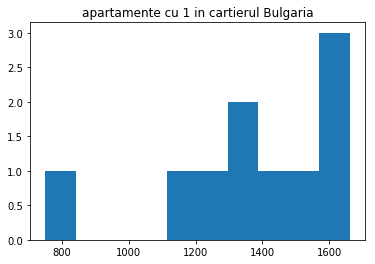

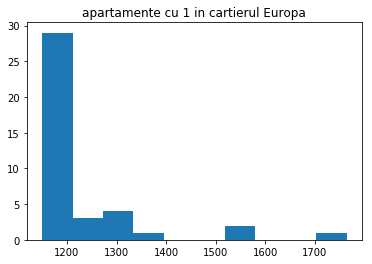

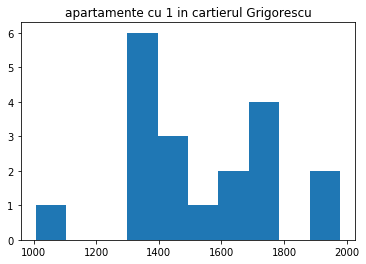

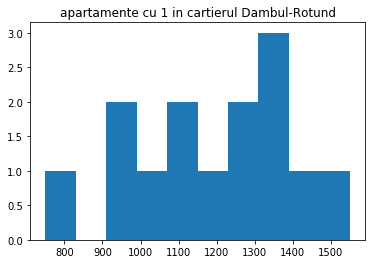

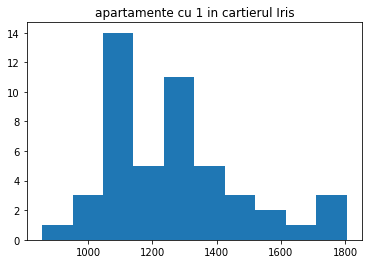

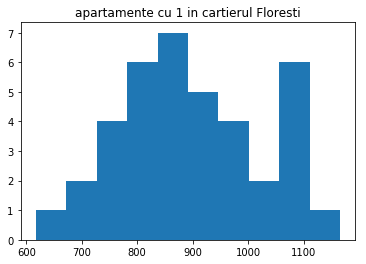

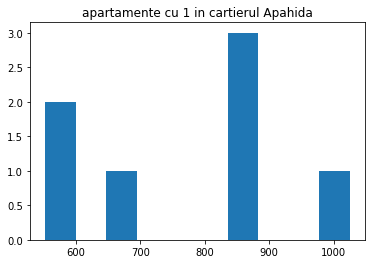

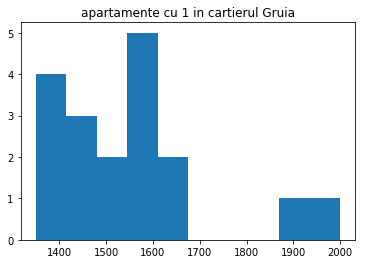

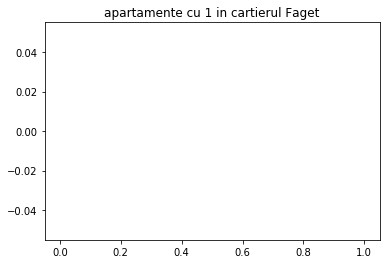

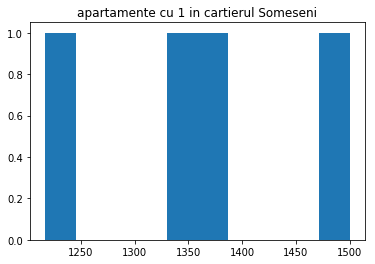

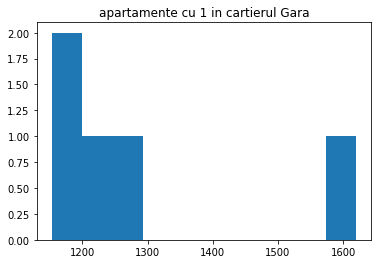

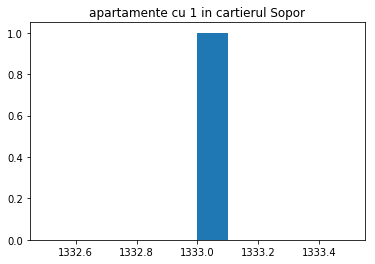

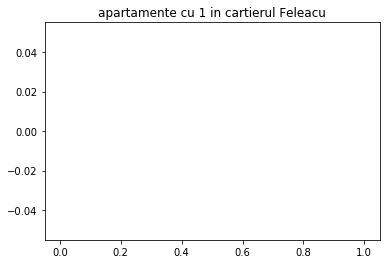

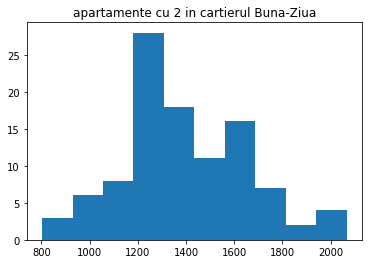

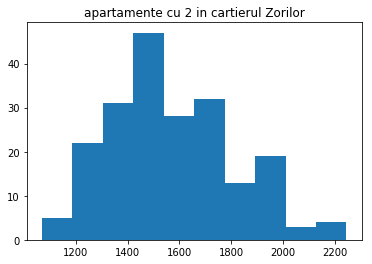

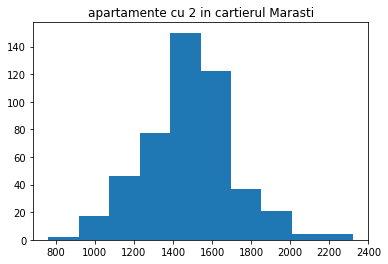

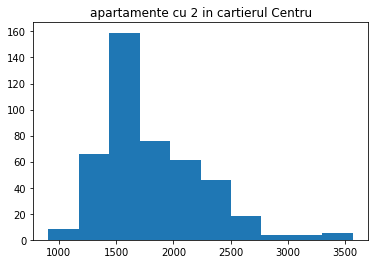

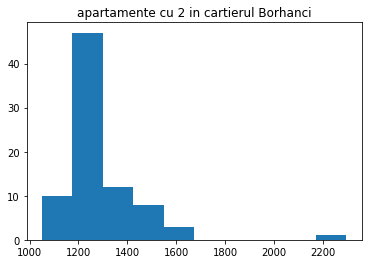

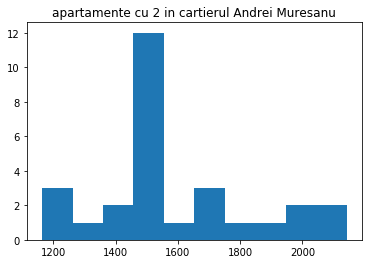

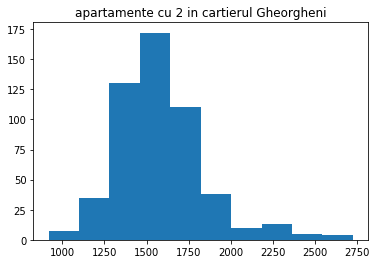

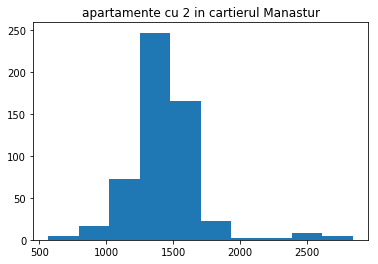

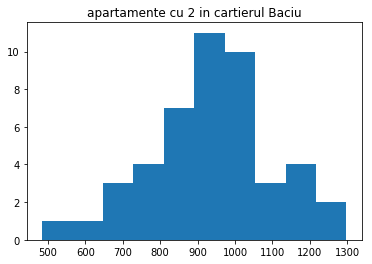

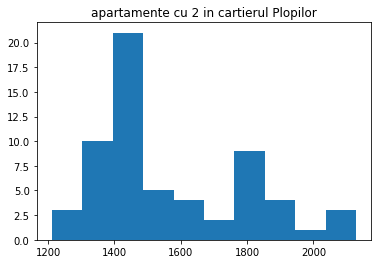

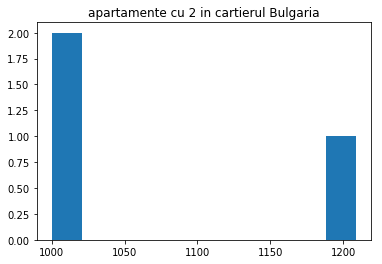

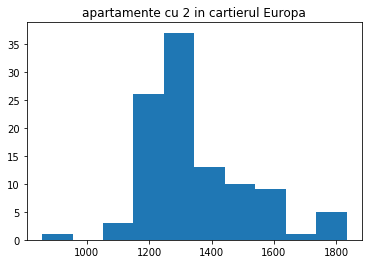

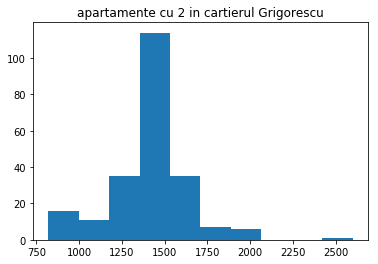

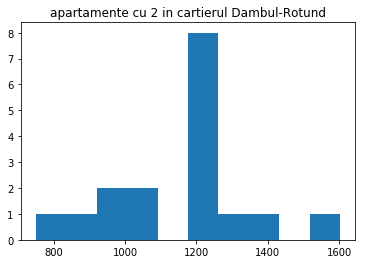

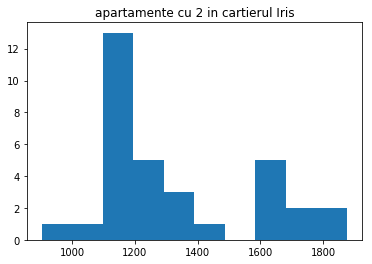

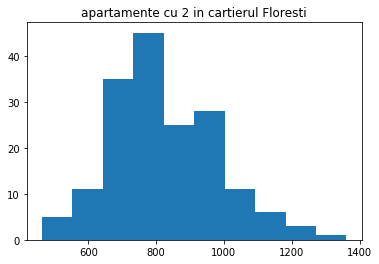

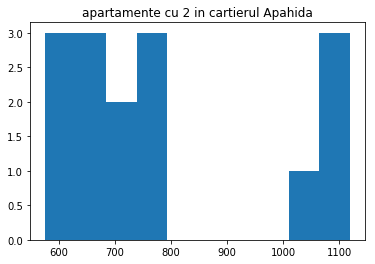

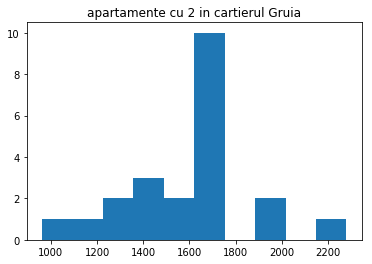

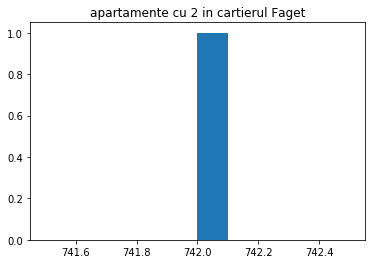

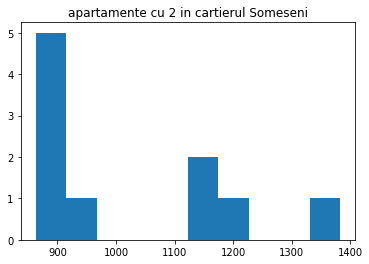

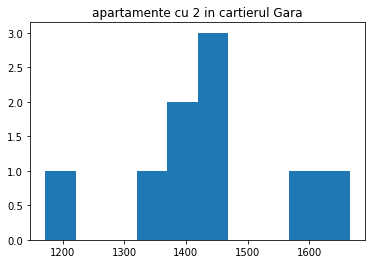

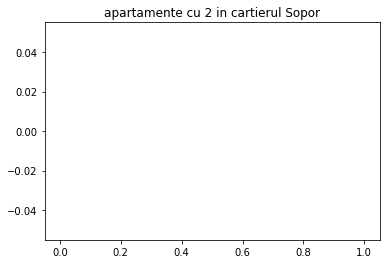

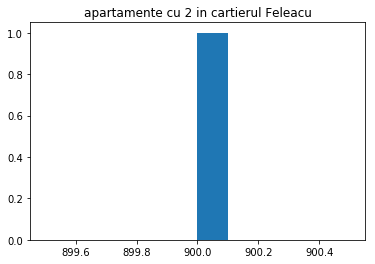

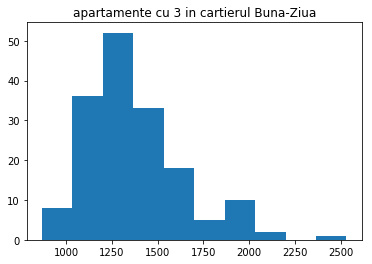

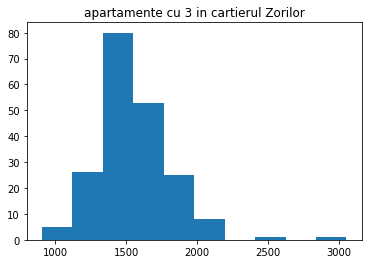

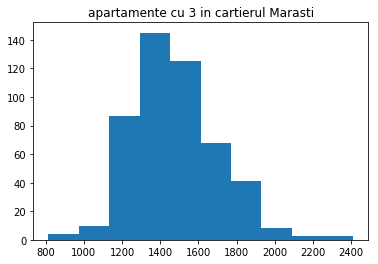

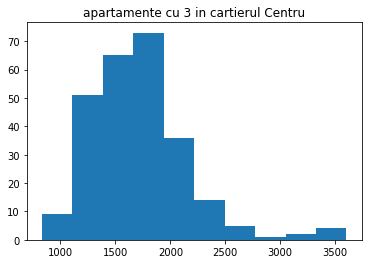

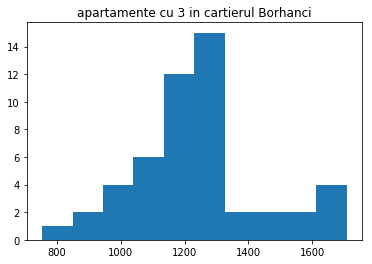

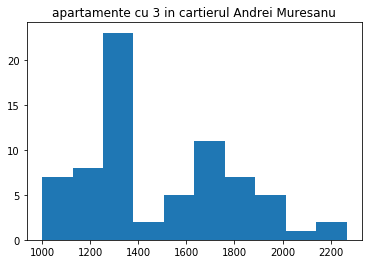

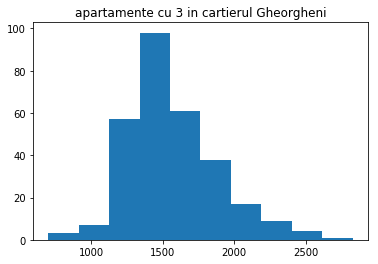

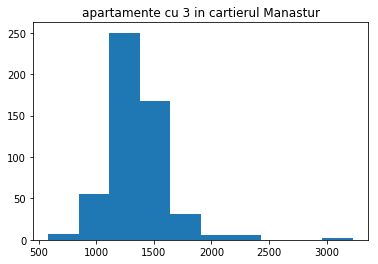

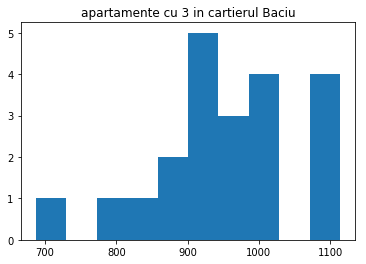

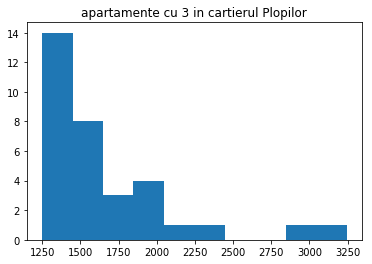

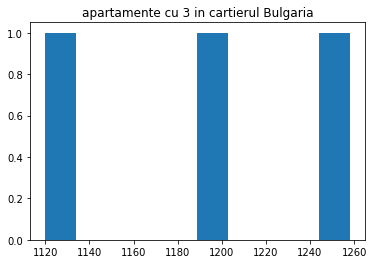

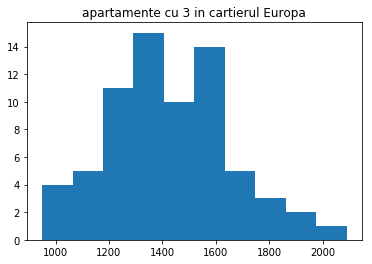

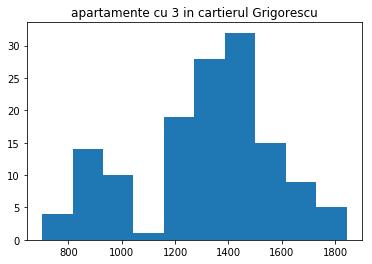

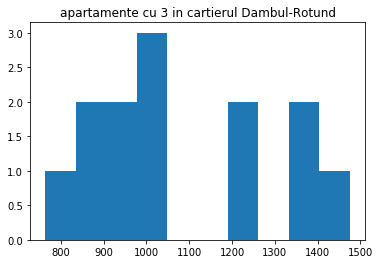

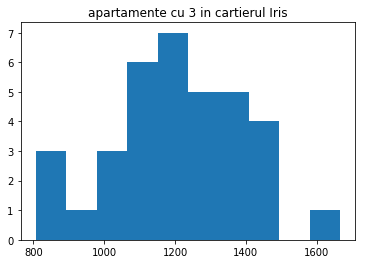

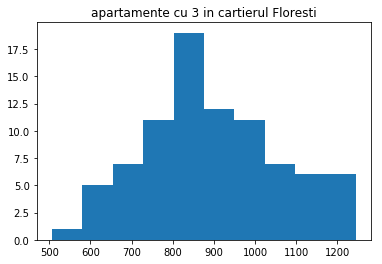

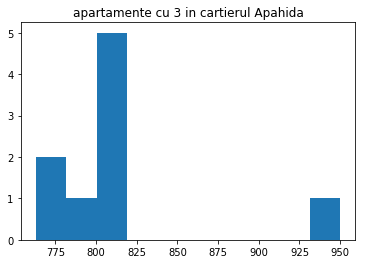

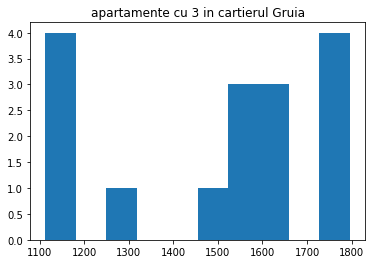

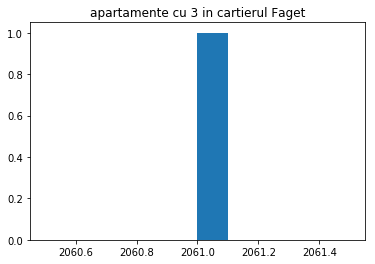

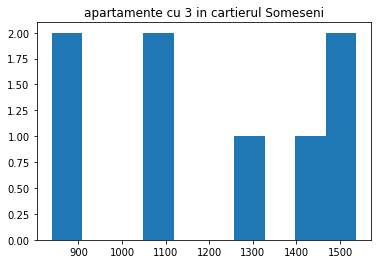

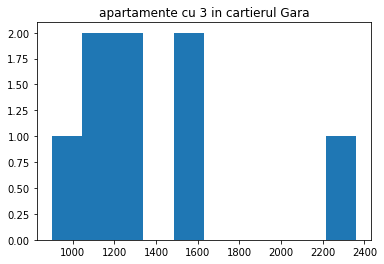

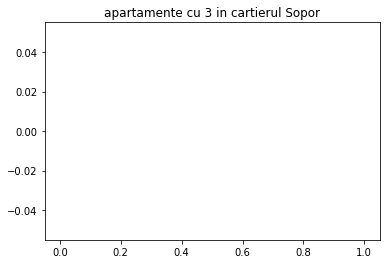

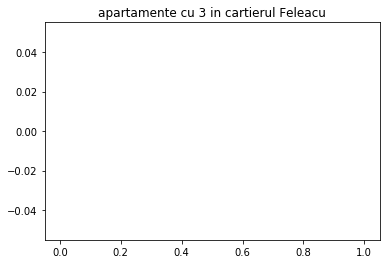

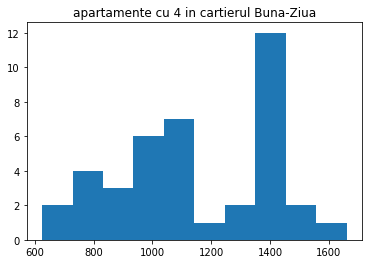

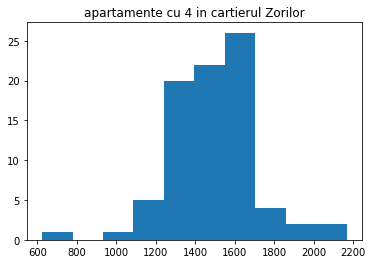

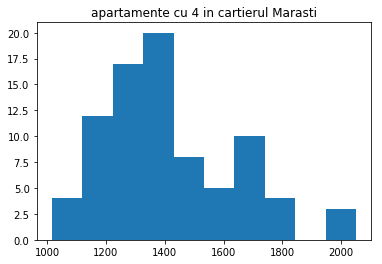

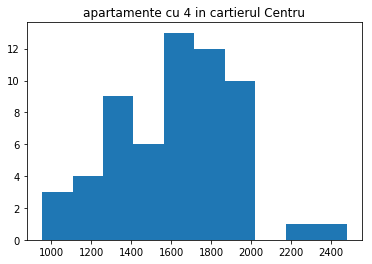

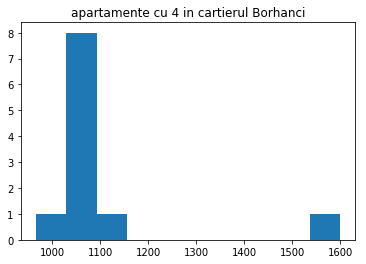

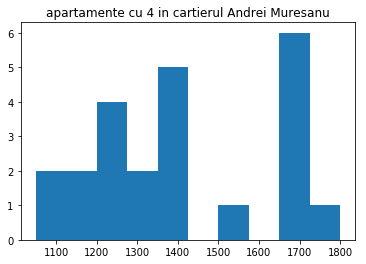

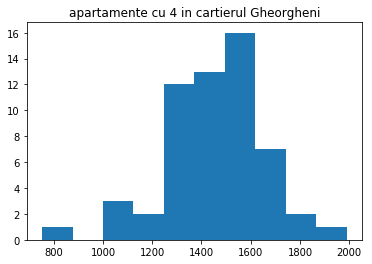

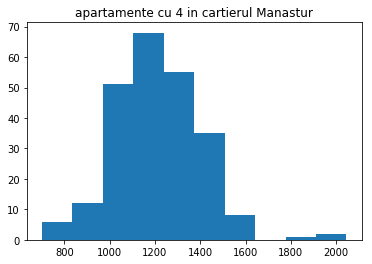

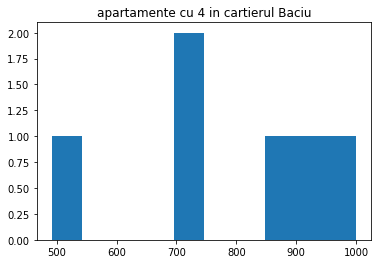

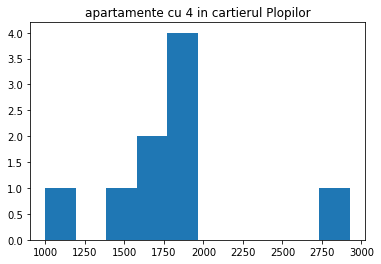

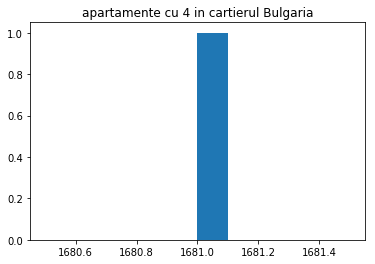

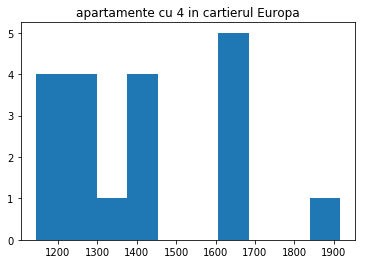

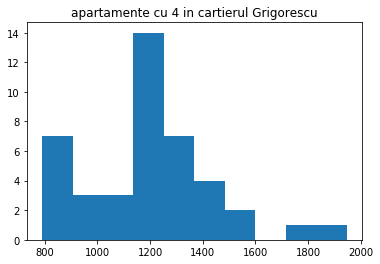

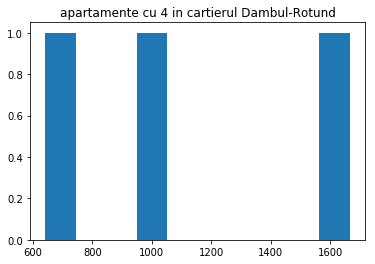

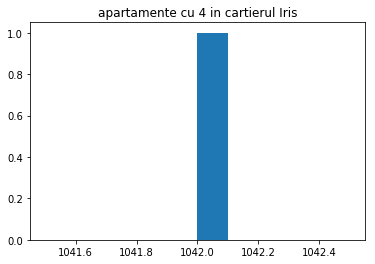

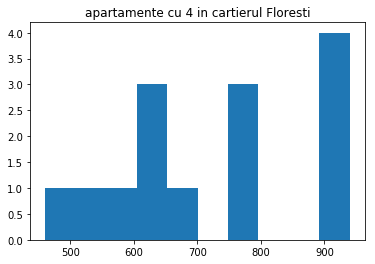

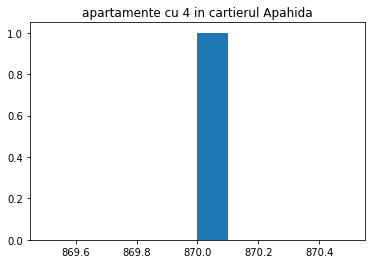

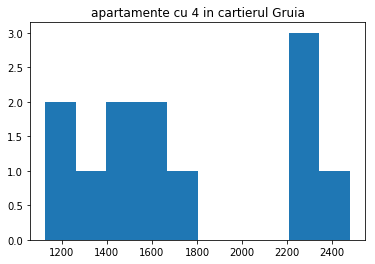

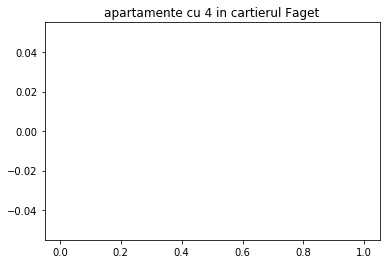

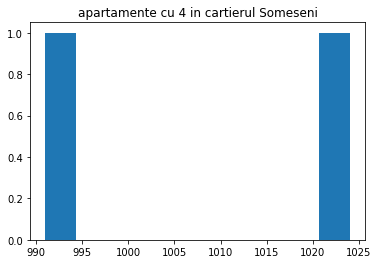

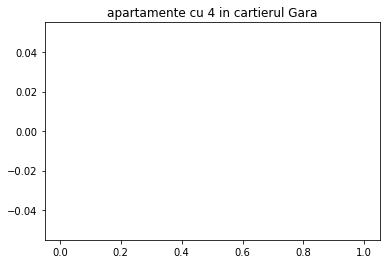

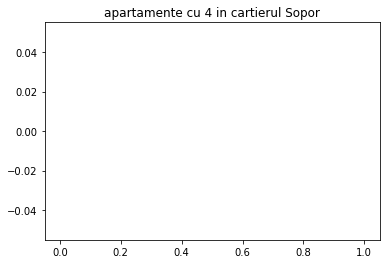

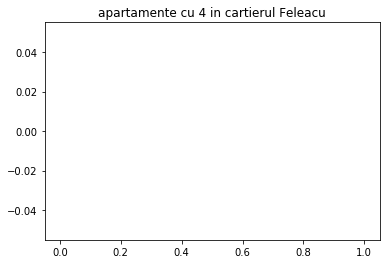

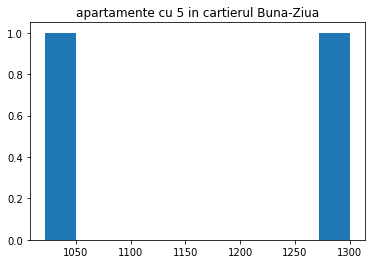

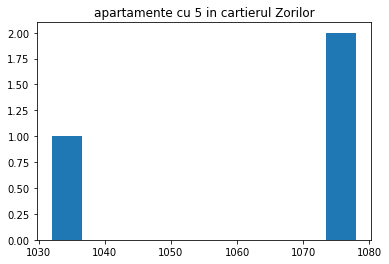

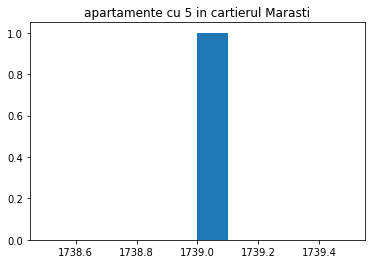

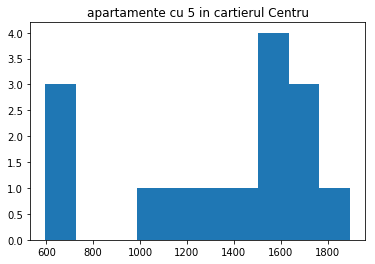

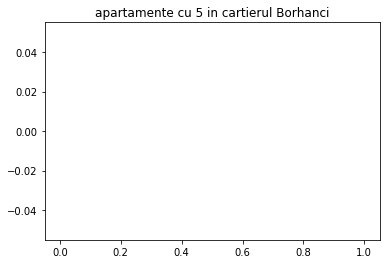

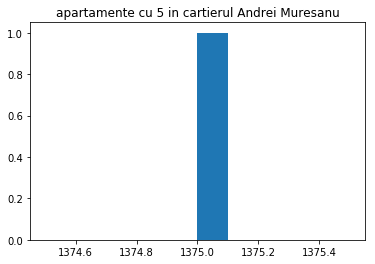

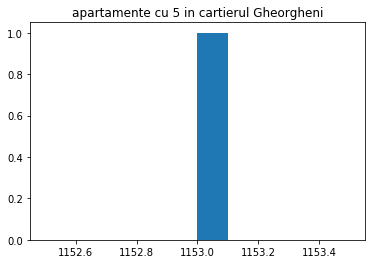

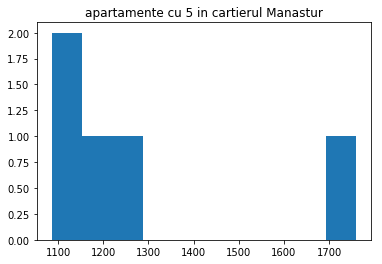

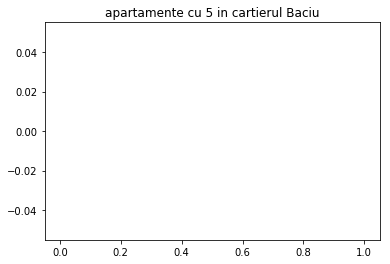

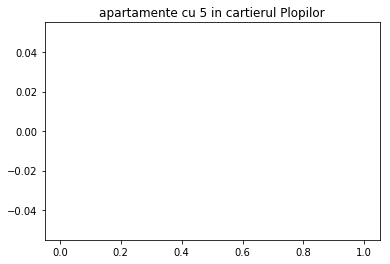

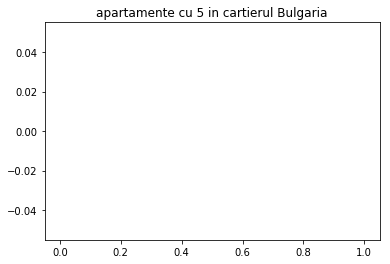

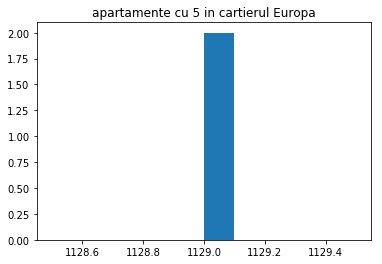

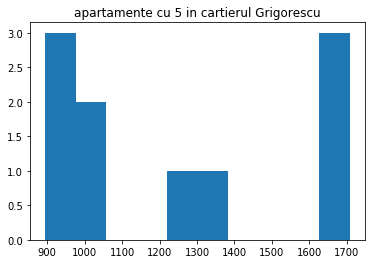

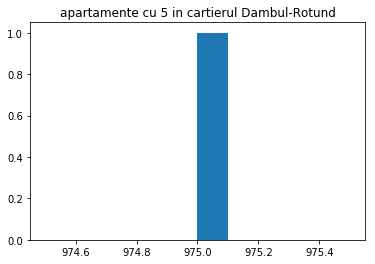

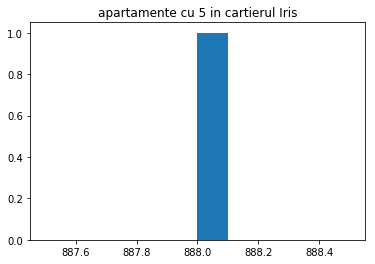

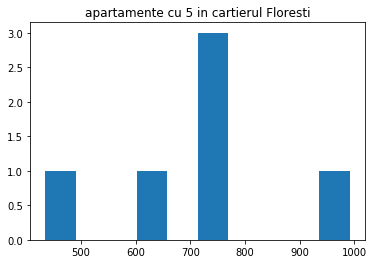

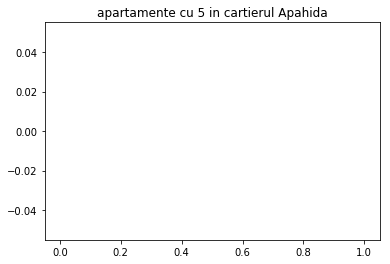

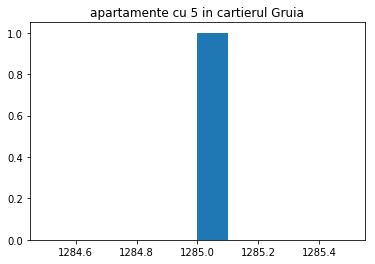

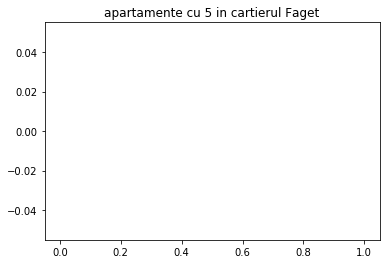

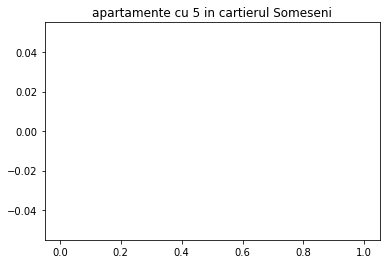

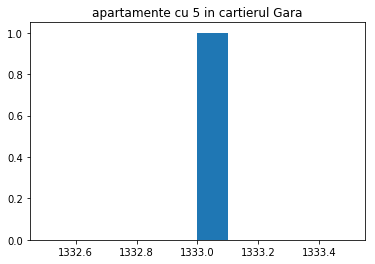

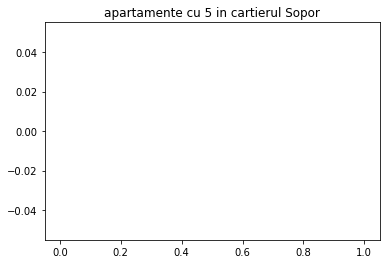

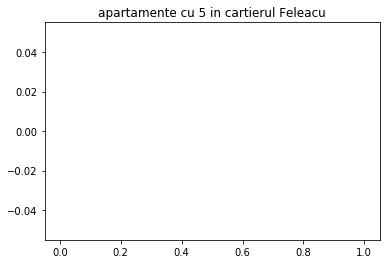

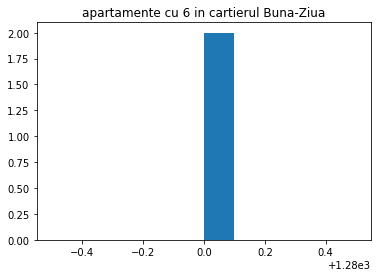

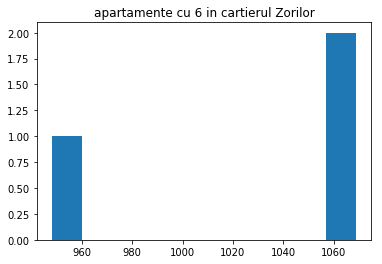

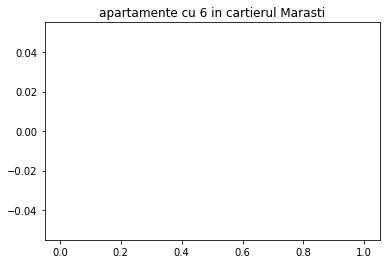

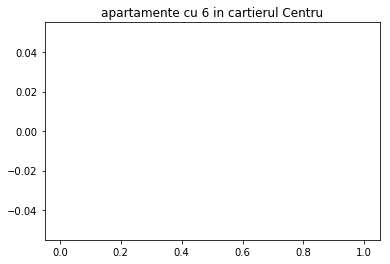

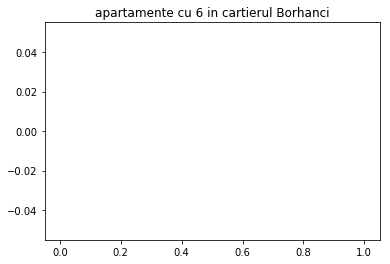

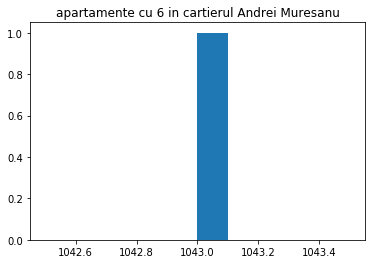

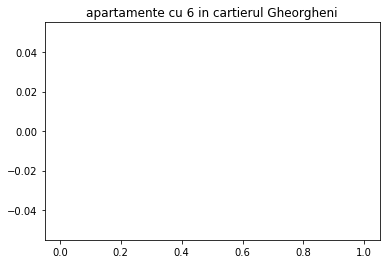

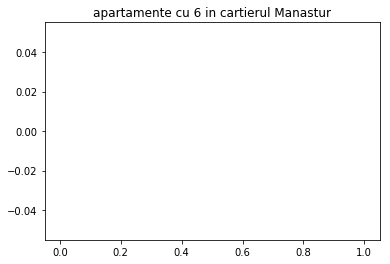

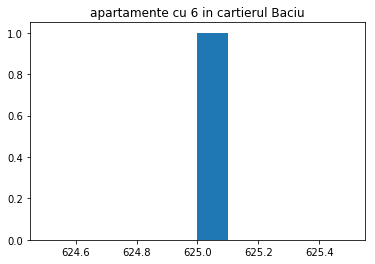

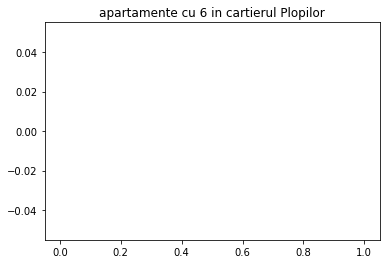

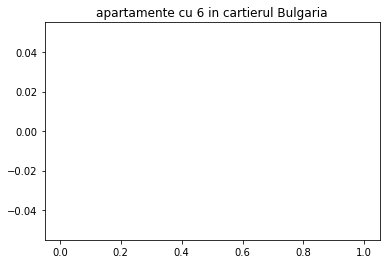

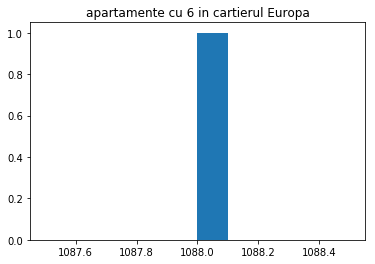

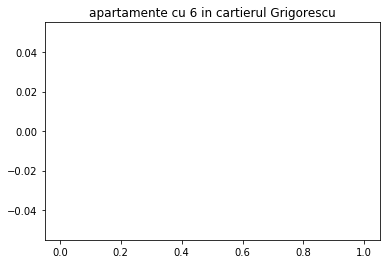

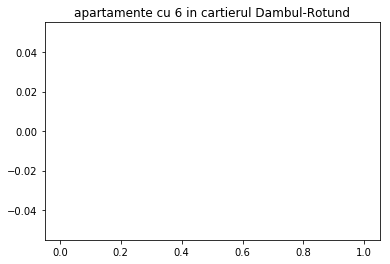

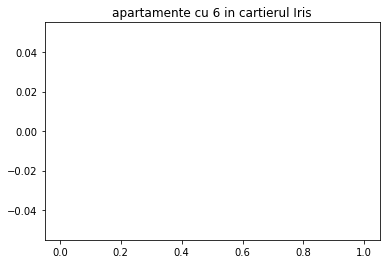

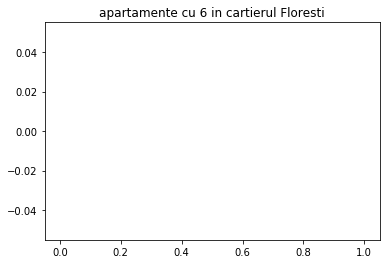

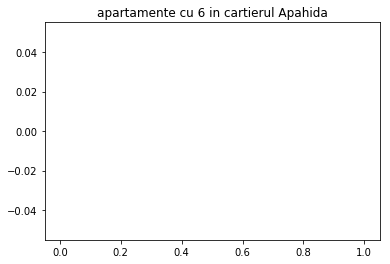

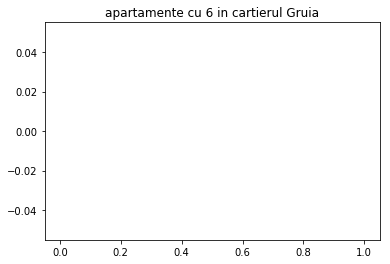

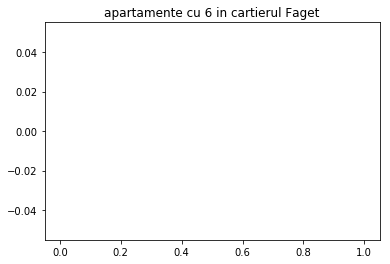

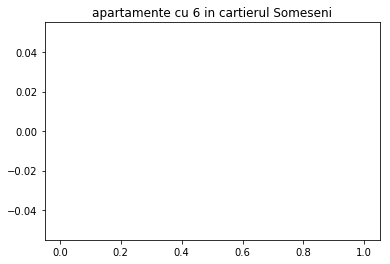

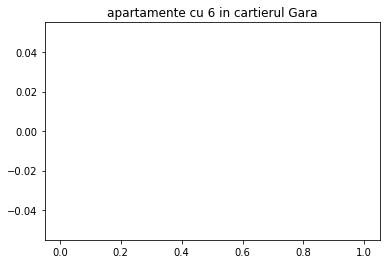

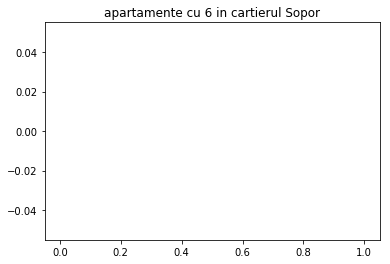

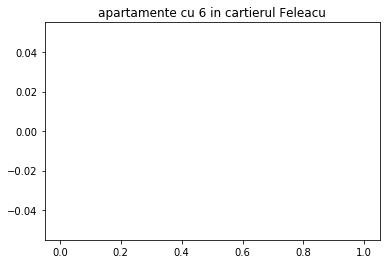

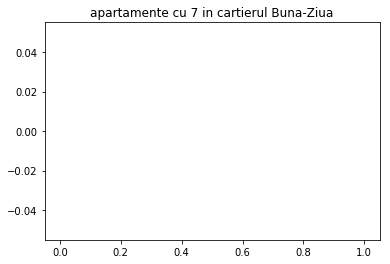

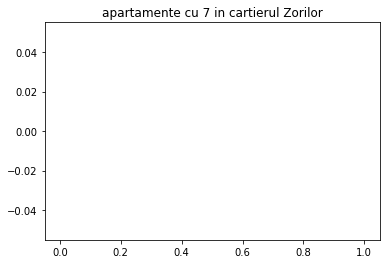

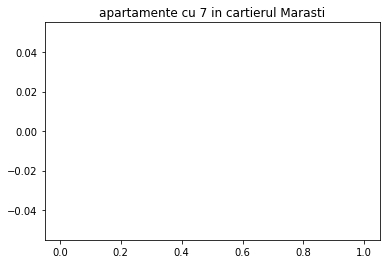

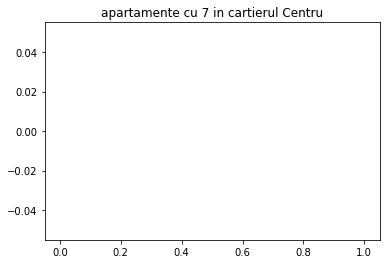

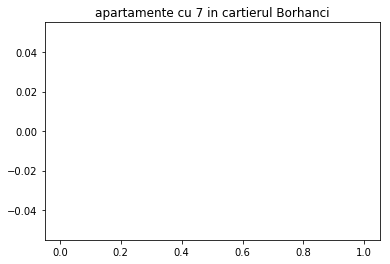

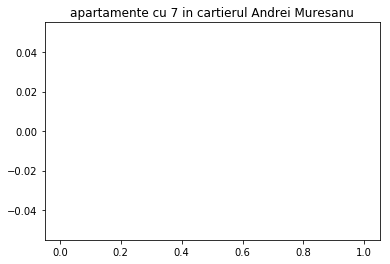

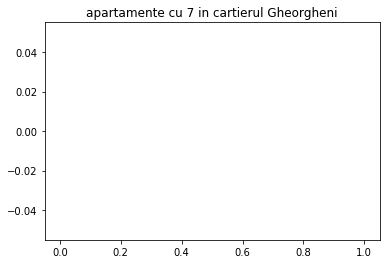

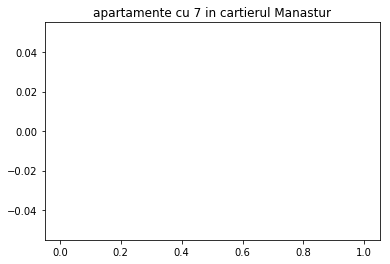

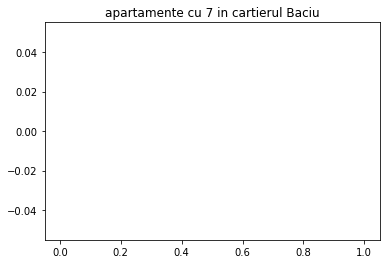

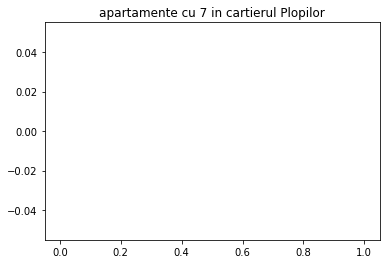

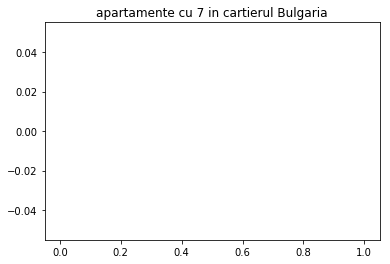

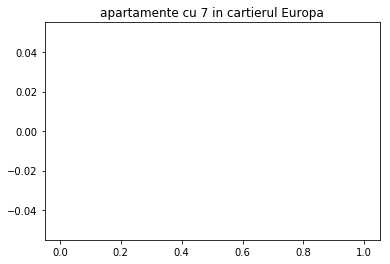

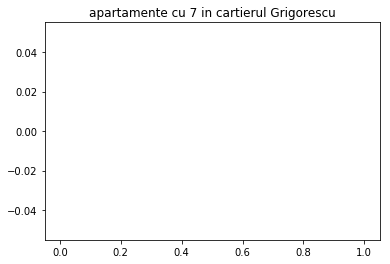

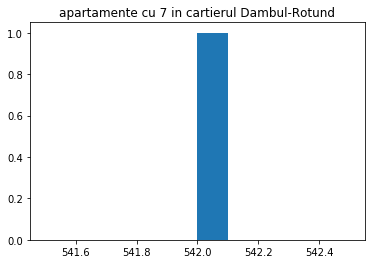

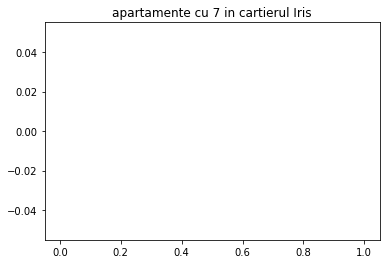

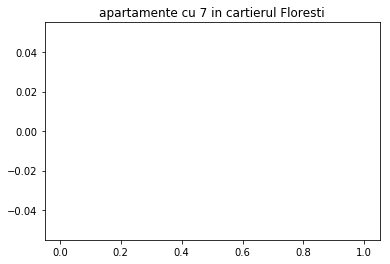

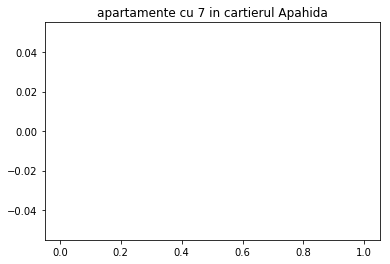

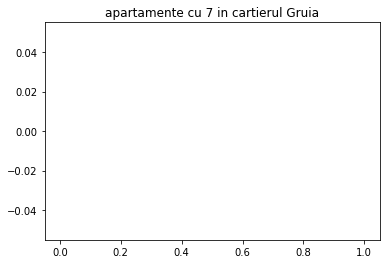

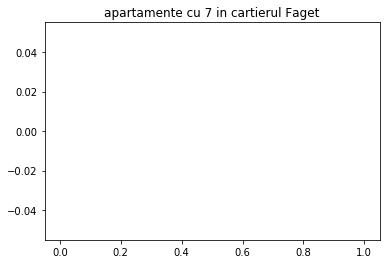

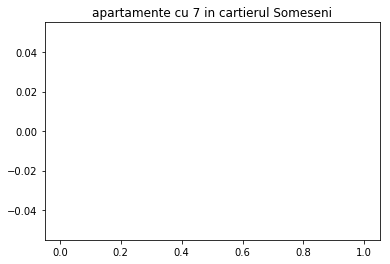

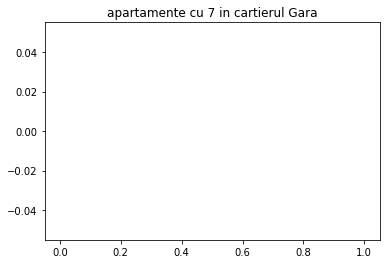

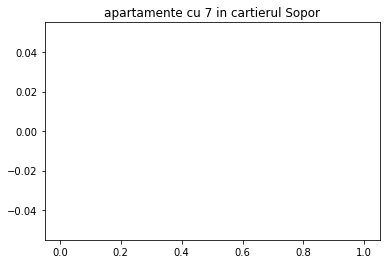

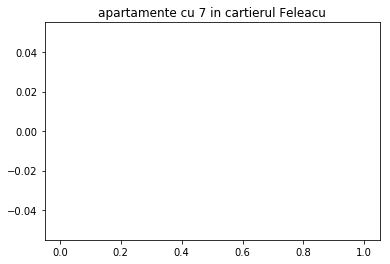

In [106]:
for i in camere:
    x = data[data['numar_camere'] == i]
    for j in cartiere:
        y = x[x['cartier'] == j]
        plt.hist(y['pret/suprafata'])
        plt.title('apartamente cu %s in cartierul %s'%(i, j))
        plt.show()

In [107]:
cartiere

['Buna-Ziua',
 'Zorilor',
 'Marasti',
 'Centru',
 'Borhanci',
 'Andrei Muresanu',
 'Gheorgheni',
 'Manastur',
 'Baciu',
 'Plopilor',
 'Bulgaria',
 'Europa',
 'Grigorescu',
 'Dambul-Rotund',
 'Iris',
 'Floresti',
 'Apahida',
 'Gruia',
 'Faget',
 'Someseni',
 'Gara',
 'Sopor',
 'Feleacu']

In [108]:
pret_mediu_cartier = []
for i in cartiere:
    x = data[data['cartier']==i]
    pmc = x['pret/suprafata'].mean()
    pret_mediu_cartier.append(pmc)

In [109]:
dictionar_pret = {}
for i in cartiere:
    x = data[data['cartier']==i]
    pmc = x['pret/suprafata'].mean()
    dictionar_pret[i]=pmc

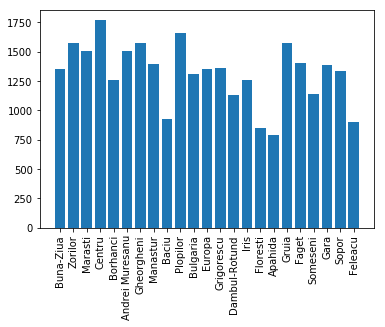

In [110]:
plt.bar(range(len(dictionar_pret)), list(dictionar_pret.values()), align='center')
plt.xticks(range(len(dictionar_pret)), list(dictionar_pret.keys()), rotation='vertical')


plt.show()

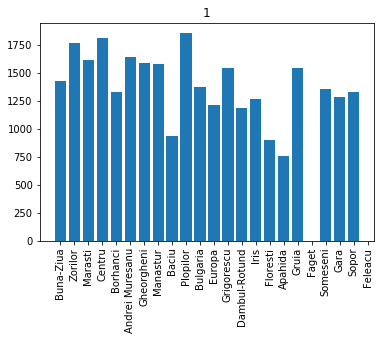

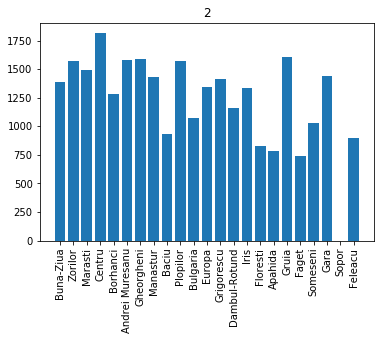

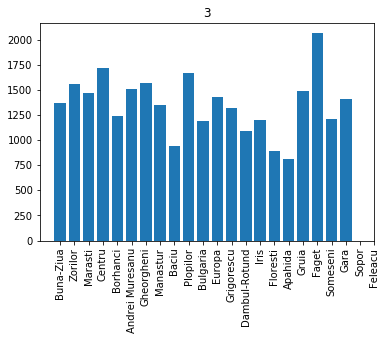

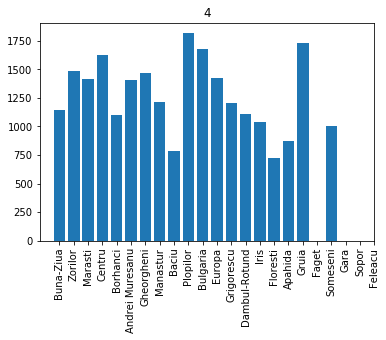

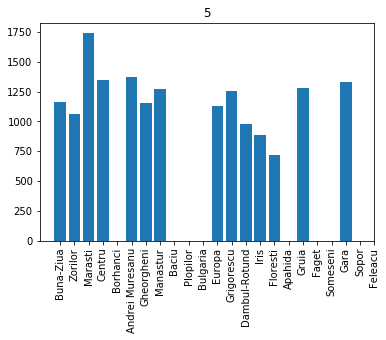

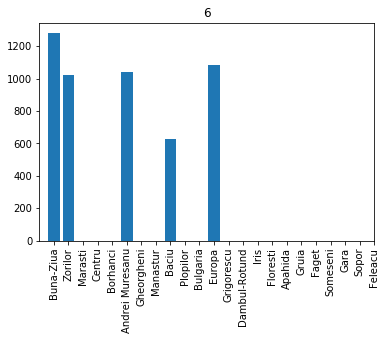

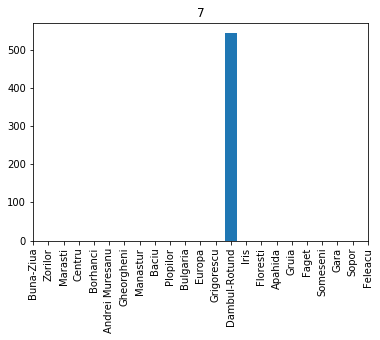

In [111]:
numar_cartier = {}
for i in camere:
    x = data[data['numar_camere'] == i]
    dict_pret = {}
    for k in cartiere:
        j = x[x['cartier']==k]
        pmc = j['pret/suprafata'].mean()
        dict_pret[k]=pmc
    plt.bar(range(len(dict_pret)), list(dict_pret.values()), align='center')
    plt.xticks(range(len(dict_pret)), list(dict_pret.keys()), rotation='vertical')
    plt.title(i)
    plt.show()

In [112]:
df = data.copy()

In [113]:
col = df.columns.tolist()

In [114]:
def valori_unice2(col):
    for x in col:
        print('{0} \n\n'.format(x) , df[x].value_counts())
        print('\n')

In [115]:
def valori_nule2(col):
    for x in col:
        print('{0}'.format(x) , df[x].isnull().sum())

In [116]:
def tipuri_date2():
    data_types = df.columns.to_series().groupby(df.dtypes).groups
    return data_types

In [117]:
_ = valori_nule2(col)

titlu 0
pret 0
oras 0
grad_finisare 3986
descriere 2
tip_oferta 467
persoana 467
etaj 1298
vechime_imobil 1843
numar_bai 1671
numar_balcoane 3152
geamuri_termopan 2747
centrala_termica 1841
compatimentare 1216
parchet 2651
confort 1848
gresie 4193
faianta 2610
zugravit_lavabil 3059
loc_parcare 5271
agentie 1139
numar_camere 0
strada 58
suprafata 0
cartier 0
link 0
modificari_interioare 7263
balcoane_inchise 6768
aer_conditionat 7298
loc_in_pod 6913
loc_in_pivnita 6619
uscator 6957
pret/suprafata 0


In [118]:
df = df.dropna(subset=['etaj', 'vechime_imobil', 'compatimentare'])

In [119]:
len(df)

5154

In [120]:
var_tinta4 = df.pret

In [121]:
var_intrare4 = df[coloane_one_hot]

In [122]:
var_intrare4 = pd.get_dummies(var_intrare4, columns=coloane_one_hot)

In [123]:
var_intrare4 = pd.concat([var_intrare4, df.suprafata], axis=1)

In [124]:
for i in adancime_arbore:
    arboreAda = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i), n_estimators=100, random_state=1)
    arboreAda.fit(var_intrare, var_tinta)


    #predictieAda = arboreAda.predict(val_X)

    scor = cross_val_score(arboreAda, var_intrare4, var_tinta4, cv=5, scoring="r2")
    print(scor.mean() ,'cu adancimea arborelui {0}'.format(i))

    #scor = cross_val_score(arboreAda, var_intrare9, var_tinta9, cv=5, scoring="neg_mean_absolute_error")
    #print(-scor.mean() , 'cu adancimea arborelui {0}'.format(i))

0.7637804888 cu adancimea arborelui 15
0.76405473551 cu adancimea arborelui 25
0.758420242898 cu adancimea arborelui 30
0.766992058667 cu adancimea arborelui 35
0.758848236594 cu adancimea arborelui 40
0.761850228128 cu adancimea arborelui 45
0.761850228128 cu adancimea arborelui 50
0.761850228128 cu adancimea arborelui 55


In [125]:

scaler4 = StandardScaler()


scaler4.fit(var_intrare4)

scaler_intrare4 = scaler4.transform(var_intrare4)

In [126]:
for i in [50, 100, 150, 200, 250, 300, 350, 400]:
    NN = MLPRegressor(solver='lbfgs', activation='logistic', alpha=0.01, hidden_layer_sizes=(i), random_state=1)


    scor = cross_val_score(NN, scaler_intrare4, var_tinta4, cv=5, scoring="r2")
    print(scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

    #scor = cross_val_score(NN, scaler_intrare4, var_tinta4, cv=5, scoring="neg_mean_absolute_error")
    #print(-scor.mean(),'cu 1 hidden layer si unitati {0}'.format(i))

0.613561107331 cu 1 hidden layer si unitati 50
0.661780153149 cu 1 hidden layer si unitati 100
0.696020268655 cu 1 hidden layer si unitati 150
0.696403160817 cu 1 hidden layer si unitati 200
0.711635440047 cu 1 hidden layer si unitati 250
0.716290732466 cu 1 hidden layer si unitati 300
0.719332674029 cu 1 hidden layer si unitati 350
0.712420736763 cu 1 hidden layer si unitati 400


Cel mai bun rezultat a fost obtinut folosind intreg setul de date si aplicand un arbore de regresie a carui performante a fost imbunatatit de algoritmul AdaBoost. Adancimea maxima a arborelui a fost setata la 35 si numarul de iterari pentru a obtine cel mai bun rezultat a fost de 100. 